# Colombian journey through Data Science

What is a Data Scientist? A quick Google search for this word gives more than 3 thousand million (3.170.000.000) results, an overwhelming number that shows the importance of this area in our society but also indicates how difficult it can be to say something original about the topic. Fortunately, curiosity, wanting to face a question and creativity are the main tools in the human intellect that allow people to do new things and advance on a particular topic.

Taking as a premise the need to answer 'real' questions, people like the authors of this notebook, who are recent graduates in the area of Pyshics and Engineering and want to get a job in a developing country, see before their eyes the opportunity to adapt their academic skills to the sexiest job of the century: Data Science. Therefore, some questions are generated: 

- What is a Data Scientist?
- At a social and local level, how is a Data Scientist described?
- In relation to the above social conditions, what skills must a Data Scientist possess?
- At the intersection of acquired knowledge and social environment, what is the possible salary of a Data Scientist?

For the first question, a summarized answer is given by [Favio Vázquez](https://medium.com/@faviovazquez): “a Data Scientist is a person(...) in charge of analyzing business/organization problems and offering a structured solution that begins by turning this problem into a valid and comprehensive question. Then, using the scientific method, programming and computational tools, develop codes that prepare, clean and analyze data to create models and answer the initial question”.

In this answer is the solution to the initial concerns of the young authors of this notebook. The questions generated by them in a precise way do not try to solve the problems of a business or organization, but to clarify the trade of a Data Scientist from a local perspective and how it is found worldwide, and thus be able to shape background skills with the objective of getting a job in Data Science.

Favio's definition gives how to do it: using scientific method. And this is where the Kaggle Platform and this wonderful competition come in, since it gives the essential raw material with which the definition of Data Science will be applied to answer concerns of the authors. In this case, questionas are above.

To make this fun, we will analyze Kaggle's data by telling a story:

## A journey to a successful Data Science World

2D is the nickname of the main character of this story, who is a guy who lives in Colombia. He has studied everything he likes in life, had excellent grades at the university but after competing his studies he decides to look for a job, with such bad luck that his knowledge in basic science is not recognized by the managers of the Business. Despite this, he is not disappointed and looks for a job at the university, since he loves teaching and masters with a certain degree of detail those subjects that are the foundations of science and engineering, but desafotunately there are no vacancies in the universities of his region.

Days go by and 2D disappointed takes refuge among his books, but due to chance in one of his statistics books that contains Pearson's tests, those that allow you to refute or approve a hypothesis in a categorical data set. This event makes him rethink the way he sees work life and he gets to the task of looking for the most in-demand job in today's times. Investigating a little more about the subject and with great surprise for him, he finds out that knowledge in basic science is a great help in the work of a Data Scientist.

With his spirit up, he undertakes a journey through the network, in search of more useful information for him. In the beginning everything he finds is wonderful but very general, which is good but he wants more concrete and precise information. After a few days he comes to a big page: *Kaggle*, which is an 'oracle' that gives answers to everything he needs.

To ask any question, the 'oracle' gives a set of data that under a programming language and an armament (set of libraries) the person asking the questions can obtain an answer. Therefore, 2D loads its best weapons (shown below) for the exploration and data visualization using Python. 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go 
import plotly.express as px
from scipy.stats import chi2_contingency
plt.style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')

Once the weapons are loaded, 2D knows that the more data the better conclusions, so he asks the oracle for the available data of the Machine Learning and Data Science topic of the years available. The very kind oracle gives the data of a population sample related to Data Science from the last 3 years.

In [10]:
df20 = pd.read_csv("kaggle_survey_2020_responses.csv")
df19 = pd.read_csv("multiple_choice_responses.csv")
df18 = pd.read_csv("multipleChoiceResponses.csv")


Once the information is obtained, 2D groups the data by Colombia, since it is the country where he resides and wants to know as much as possible about Data Science in this region.

In [3]:
#Espacio muestral a trabajar: Colombia
df20c = df20.groupby('Q3').get_group('Colombia')
df19c = df19.groupby('Q3').get_group('Colombia')
df18c = df18.groupby('Q3').get_group('Colombia')

As he explores the data, 2D realizes that the oracle offers data sets with the following types of questions:

In [4]:
#Types of ask
ask20 = df20.loc[0].to_dict()
ask19 = df19.loc[0].to_dict()
ask18 = df18.loc[0].to_dict()

The first thing that occurs to 2D is to verify in what age range is the sample of people related to Data Science in his country and worldwide graphically.

# Age range

Sort by age ranges:

In [6]:
#What is your age (Colombia)?
age_18c = pd.DataFrame(pd.Series(df18c.Q2.value_counts().sort_index()))
age_19c = pd.DataFrame(pd.Series(df19c.Q1.value_counts().sort_index()))
age_20c = pd.DataFrame(pd.Series(df20c.Q1.value_counts().sort_index()))

#What is your age (worldwide)?
age_18 = pd.DataFrame(pd.Series(df18.Q2.value_counts().sort_index()))
age_19 = pd.DataFrame(pd.Series(df19.Q1.value_counts().sort_index()))
age_20 = pd.DataFrame(pd.Series(df20.Q1.value_counts().sort_index()))

Where the population sample for each year had the following number of respondents:

In [7]:
print(f'In 2020 there were {age_20.Q1.sum()} people surveyed')
print(f'In 2019 there were {age_19.Q1.sum()} people surveyed')
print(f'In 2018 there were {age_18.Q2.sum()} people surveyed')

In 2020 there were 20037 people surveyed
In 2019 there were 19718 people surveyed
In 2018 there were 23860 people surveyed


Reseting the index on every DataFrame, renaming column names and adding the corresponding year survey:

In [8]:
age_18c = age_18c.rename_axis('Range').reset_index()
age_19c = age_19c.rename_axis('Range').reset_index()
age_20c = age_20c.rename_axis('Range').reset_index()
age_18c.rename(columns = {'Q2':'Count'}, inplace = True) 
age_19c.rename(columns = {'Q1':'Count'}, inplace = True) 
age_20c.rename(columns = {'Q1':'Count'}, inplace = True) 
age_18c['year'] = 2018
age_19c['year'] = 2019
age_20c['year'] = 2020

age_18 = age_18.rename_axis('Range').reset_index()
age_19 = age_19.rename_axis('Range').reset_index()
age_20 = age_20.rename_axis('Range').reset_index()
age_18.rename(columns = {'Q2':'Count'}, inplace = True) 
age_19.rename(columns = {'Q1':'Count'}, inplace = True) 
age_20.rename(columns = {'Q1':'Count'}, inplace = True) 
age_18['year'] = 2018
age_19['year'] = 2019
age_20['year'] = 2020

In [9]:
color18 = 'rgb(125, 64, 55)'
color19 = 'rgb(240, 141, 51)'
color20 = 'rgb(26, 125, 80)'

fig = go.Figure(data=[
    go.Bar(name='2018', x=age_18c['Range'], y=age_18c['Count'], marker_color = color18),
    go.Bar(name='2019', x=age_19c['Range'], y=age_19c['Count'], marker_color = color19),
    go.Bar(name='2020', x=age_20c['Range'], y=age_20c['Count'], marker_color = color20)
])
# Change the bar mode
fig.update_layout(
    title='Age ranges in Colombia',
    xaxis = dict(
        title='Age ranges',
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

To 2D's surprise, he finds that the population mode in Colombia has an age range of [25-29] years, which is a range in which his age is found. He also realizes that in general, every year the number of people over the age of 22 increases.

2D wants to review the behavior of the age range for each country by year, so he decides to contrast the information in a contingency table for all the countries that are repeated in the surveys for each year.

In [10]:
c20 = pd.crosstab(df20.Q1, df20.Q3)
c19 = pd.crosstab(df19.Q1, df19.Q3)
c18 = pd.crosstab(df18.Q2, df18.Q3)

c20 = c20.drop(['What is your age (# years)?'],axis=0)
c19 = c19.drop(['What is your age (# years)?'],axis=0)
c18 = c18.drop(['What is your age (# years)?'],axis=0)
c20 = c20.drop(['In which country do you currently reside?'],axis=1)
c20 = c20.drop(['Ghana', 'United Arab Emirates', 'Sri Lanka', 'Nepal', 'Taiwan', 'Saudi Arabia'],axis=1)
c19 = c19.drop(['In which country do you currently reside?'],axis=1)
c18 = c18.drop(['In which country do you currently reside?'],axis=1)
c18 = c18.drop(['I do not wish to disclose my location'],axis=1)

col_ref = c20.columns

c19 = c19[col_ref]
c18 = c18[col_ref]

ff20 = np.log(c20+1)
ff19 = np.log(c19+1)
ff18 = np.log(c18+1)
#style image
style2 = "Blues"
style1 = 'Greens'

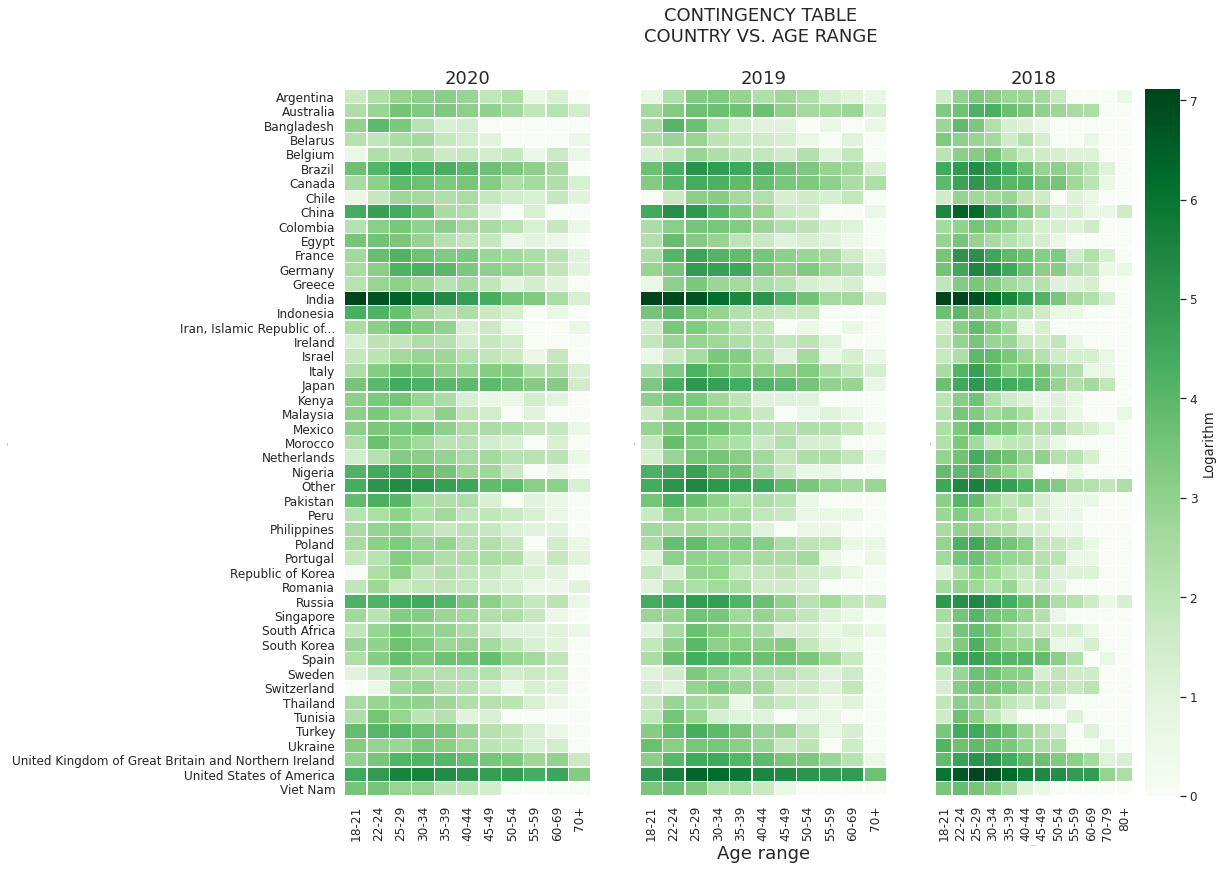

In [11]:
plt.figure(figsize=(15,13))
sns.set(font_scale=1.1)
ax1 = plt.subplot(131)
ax1 = sns.heatmap(ff20.T, cmap=style1, 
           linewidth=0.3, cbar=False);
ax1.set_ylabel('Country',fontsize=0)
ax1.set_xlabel('Age range',fontsize=0)
# title
ax1.set_title('2020',fontsize=18)
#plt.title(title, loc='left',fontsize=18)

ax2 = plt.subplot(132, sharey=ax1)
ax2 = sns.heatmap(ff19.T, cmap=style1, 
           linewidth=0.3, cbar=False);
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('Country',fontsize=0)
ax2.set_xlabel('Age range',fontsize=18)
# title
ax2.set_title('CONTINGENCY TABLE \nCOUNTRY VS. AGE RANGE \n\n2019',fontsize=18)

ax3 = plt.subplot(133, sharey=ax1)
ax3 = sns.heatmap(ff18.T, cmap=style1, 
           linewidth=0.3, cbar_kws={'label': 'Logarithm'})
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.set_ylabel('Country',fontsize=0)
ax3.set_xlabel('Age range',fontsize=0)
# title
ax3.set_title('2018',fontsize=18);

With this visual contigence table, 2D recalls a visualization 'trick' of his basic university courses, and it is to transform the variables to a logarithmic scale in order to better read the information. With this, 2D realizes, for example, that in India the mode in the age range is [18-21], being the lowest age range and maintaining this range in the 3 years in which the surveys were conducted. It is also curious that the distribution of the age range in the United States of America in 2018 was concentrated in [25-29], that is, the mode value, but in 2019 and 2020 this concentration of values is dispersed to higher ranges, although the mode remains. Finally 2D finds that the worldwide mode range is [25-29], the same as his country of origin.

With a smile at the pleasant result found, 2D decides to see what the proportion of men and women is like in his country and worldwide.

# Gender

In [12]:
#What is your gender for year in Colombia? 
sex_18 = pd.DataFrame(pd.Series(df18c.Q1.value_counts().sort_index()))
sex_19 = pd.DataFrame(pd.Series(df19c.Q2.value_counts().sort_index()))
sex_20 = pd.DataFrame(pd.Series(df20c.Q2.value_counts().sort_index()))

In [13]:
sex_18 = sex_18.rename_axis('Sex').reset_index()
sex_19 = sex_19.rename_axis('Sex').reset_index()
sex_20 = sex_20.rename_axis('Sex').reset_index()
sex_18.rename(columns = {'Q1':'Count'}, inplace = True) 
sex_19.rename(columns = {'Q2':'Count'}, inplace = True) 
sex_20.rename(columns = {'Q2':'Count'}, inplace = True) 
sex_18['year'] = 2018
sex_19['year'] = 2019
sex_20['year'] = 2020
sex_20.loc[sex_20['Sex']=="Man", "Sex"] = "Male"
sex_20.loc[sex_20['Sex']=="Woman", "Sex"] = "Female"

In [14]:
fig = go.Figure(data=[
    go.Bar(name='2018', x=sex_18['Sex'], y=sex_18['Count'], marker_color = color18),
    go.Bar(name='2019', x=sex_19['Sex'], y=sex_19['Count'], marker_color = color19),
    go.Bar(name='2020', x=sex_20['Sex'], y=sex_20['Count'], marker_color = color20)
])
# Change the bar mode
fig.update_layout(
    title='Gender in Colombia',
    xaxis = dict(
        title='Gender',
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

With nostalgia, he observes that the number of women is considerably less than that of men, and not to mention the inclusion of the different groups or LGTBI communities. That is, although we are talking about the sexiest profession of the century, it is still a profession dominated by the male gender. Is this the same result globally?

In [15]:
g20 = pd.crosstab(df20.Q2, df20.Q3)
g19 = pd.crosstab(df19.Q2, df19.Q3)
g18 = pd.crosstab(df18.Q1, df18.Q3)

g20 = g20.drop(['Nonbinary'],axis=0)
g20 = g20.drop(['Prefer not to say'],axis=0)
g20 = g20.drop(['Prefer to self-describe'],axis=0)
g20 = g20.drop(['What is your gender? - Selected Choice'],axis=0)
g19 = g19.drop(['Prefer not to say'],axis=0)
g19 = g19.drop(['Prefer to self-describe'],axis=0)
g19 = g19.drop(['What is your gender? - Selected Choice'],axis=0)
g18 = g18.drop(['Prefer not to say'],axis=0)
g18 = g18.drop(['Prefer to self-describe'],axis=0)
g18 = g18.drop(['What is your gender? - Selected Choice'],axis=0)
g20 = g20.drop(['In which country do you currently reside?'],axis=1)
g20 = g20.drop(['Ghana', 'United Arab Emirates', 'Sri Lanka', 'Nepal', 'Taiwan', 'Saudi Arabia'],axis=1)
g19 = g19.drop(['In which country do you currently reside?'],axis=1)
g18 = g18.drop(['In which country do you currently reside?'],axis=1)
g18 = g18.drop(['I do not wish to disclose my location'],axis=1)

col_ref = g20.columns

g19 = g19[col_ref]
g18 = g18[col_ref]

ffg20 = np.log(g20+1).T
ffg20 = ffg20[['Woman',"Man"]]
ffg20.rename(columns={'Woman': 'Female', 'Man': 'Male'}, inplace=True)
ffg19 = np.log(g19+1).T
ffg18 = np.log(g18+1).T


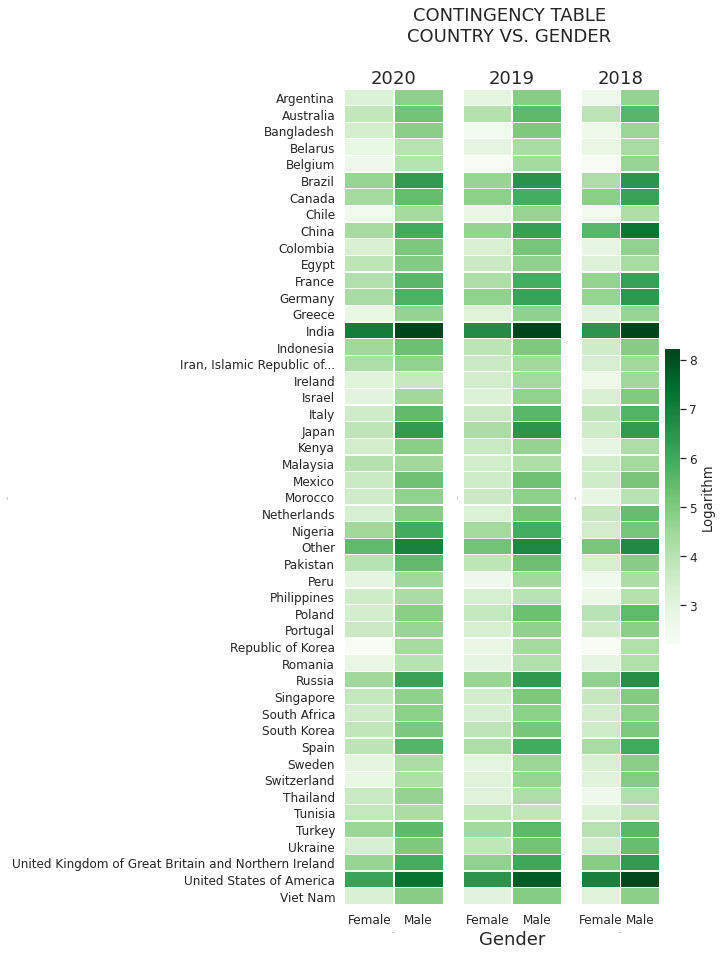

In [16]:
plt.figure(figsize=(6,15))
sns.set(font_scale=1.1)
ax1 = plt.subplot(131)
ax1 = sns.heatmap(ffg20, cmap= style1 , 
           linewidth=0.3, cbar=False);
ax1.set_ylabel('Country',fontsize=0)
ax1.set_xlabel('Gender',fontsize=0)
# title
ax1.set_title('2020',fontsize=18)
#plt.title(title, loc='left',fontsize=18)

ax2 = plt.subplot(132, sharey= ax1)
ax2 = sns.heatmap(ffg19, cmap= style1 , 
           linewidth=0.3, cbar=False);
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('Country',fontsize=0)
ax2.set_xlabel('Gender',fontsize=18)
# title
ax2.set_title('CONTINGENCY TABLE \nCOUNTRY VS. GENDER \n\n2019',fontsize=18)

ax3 = plt.subplot(133, sharey= ax1)
ax3 = sns.heatmap(ffg18,  cmap= style1 ,
           linewidth=0.3, cbar_kws={'label': 'Logarithm'});
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.set_ylabel('Country',fontsize=0)
ax3.set_xlabel('Gender',fontsize=0)
# title
ax3.set_title('2018',fontsize=18);

2D notes the marked similarity on a global level, and that is that in all countries there are more men than women working in this area, which is sad and disappointing. Yet he continues to ask the 'oracle' with perhaps something more encouraging, which is the level of formal education.

# Highest level of formal education 

In [17]:
#What is the highest level of formal education that you have attained or plan to attain within the next 2 years for year in Colombia?
edu_18 = pd.DataFrame(pd.Series(df18c.Q4.value_counts().sort_index()))
edu_19 = pd.DataFrame(pd.Series(df19c.Q4.value_counts().sort_index()))
edu_20 = pd.DataFrame(pd.Series(df20c.Q4.value_counts().sort_index()))

In [18]:
edu_18 = edu_18.rename_axis('level_education').reset_index()
edu_19 = edu_19.rename_axis('level_education').reset_index()
edu_20 = edu_20.rename_axis('level_education').reset_index()
edu_18.rename(columns = {'Q4':'Count'}, inplace = True) 
edu_19.rename(columns = {'Q4':'Count'}, inplace = True) 
edu_20.rename(columns = {'Q4':'Count'}, inplace = True) 
edu_18['year'] = 2018
edu_19['year'] = 2019
edu_20['year'] = 2020

In [19]:
edu_18.loc[edu_18['level_education']=="Some college/university study without earning a bachelor’s degree", "level_education"] = "Without Bachelor's degree"
edu_19.loc[edu_19['level_education']=="Some college/university study without earning a bachelor’s degree", "level_education"] = "Without Bachelor's degree"
edu_20.loc[edu_20['level_education']=="Some college/university study without earning a bachelor’s degree", "level_education"] = "Without Bachelor's degree"

In [20]:
fig = go.Figure(data=[
    go.Bar(name='2018', x=edu_18['level_education'], y=edu_18['Count'], marker_color = color18),
    go.Bar(name='2019', x=edu_19['level_education'], y=edu_19['Count'], marker_color = color19),
    go.Bar(name='2020', x=edu_20['level_education'], y=edu_20['Count'], marker_color = color20)    
])
# Change the bar mode
fig.update_layout(
    title='Highest level of formal education in Colombia',
    xaxis = dict(
        title='Education level',
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

A pleasant surprise for 2D to realize that his country, a developing country, a large part of the population that is dedicated to the field of Data Science (DS) and Machine learning (ML) have a master's degree. This means, the mode in the Colombian data set is to have a master's degree. 2D then asks the same question worldwide, showing the results in a contingency table.

In [21]:
s20 = pd.crosstab(df20.Q3, df20.Q4)
s20 = s20.drop(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'], axis=1)
s20 = s20.drop(['In which country do you currently reside?'],axis=0)
s20.rename(columns = {'Some college/university study without earning a bachelor’s degree':'Without bachelor degree'}, inplace = True)
s20.rename(columns = {'No formal education past high school':'Informal education'}, inplace = True)
s19 = pd.crosstab(df19.Q3, df19.Q4)
s19 = s19.drop(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'], axis=1)
s19 = s19.drop(['In which country do you currently reside?'],axis=0)
s19.rename(columns = {'Some college/university study without earning a bachelor’s degree':'Without bachelor degree'}, inplace = True)
s19.rename(columns = {'No formal education past high school':'Informal education'}, inplace = True)

s18 = pd.crosstab(df18.Q3, df18.Q4)
s18 = s18.drop(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'], axis=1)
s18 = s18.drop(['In which country do you currently reside?'],axis=0)
s18.rename(columns = {'Some college/university study without earning a bachelor’s degree':'Without bachelor degree'}, inplace = True)
s18.rename(columns = {'No formal education past high school':'Informal education'}, inplace = True)

#mach country in all dataset
s20 = s20.T.drop(['Ghana', 'United Arab Emirates', 'Sri Lanka', 'Nepal', 'Taiwan', 'Saudi Arabia'],axis=1)
s19 = s19.T[col_ref]
s18 = s18.T[col_ref]
#log scale for grapic
ss20 = np.log(s20+1)
ss19 = np.log(s19+1)
ss18 = np.log(s18+1)


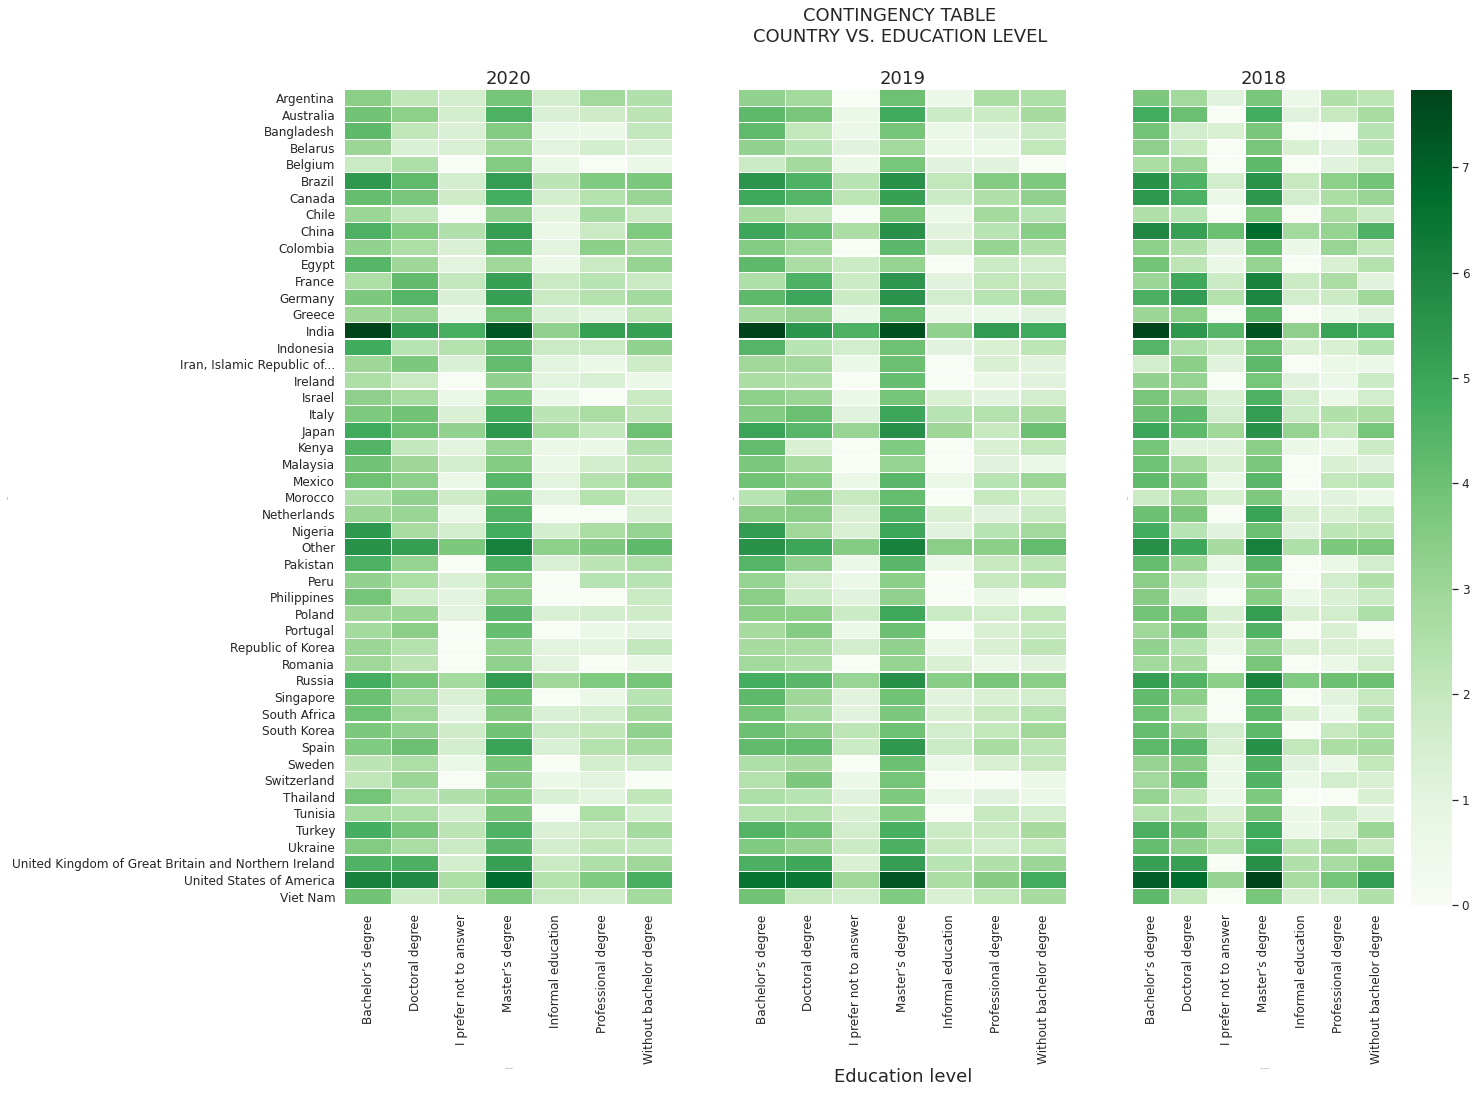

In [22]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.1)
ax1 = plt.subplot(131)
ax1 = sns.heatmap(ss20.T, cmap=style1, 
           linewidth=0.3, cbar=False);
ax1.set_ylabel('Country',fontsize=0)
ax1.set_xlabel('Level education',fontsize=0)
# title
ax1.set_title('2020',fontsize=18)
#plt.title(title, loc='left',fontsize=18)

ax2 = plt.subplot(132, sharey=ax1)
ax2 = sns.heatmap(ss19.T, cmap=style1, 
           linewidth=0.3, cbar=False);
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('Country',fontsize=0)
ax2.set_xlabel('Education level',fontsize=18)
# title
ax2.set_title('CONTINGENCY TABLE \nCOUNTRY VS. EDUCATION LEVEL \n\n2019',fontsize=18)

ax3 = plt.subplot(133, sharey=ax1)
ax3 = sns.heatmap(ss18.T, cmap=style1, 
           linewidth=0.3);
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.set_ylabel('Country',fontsize=0)
ax3.set_xlabel('Level  education',fontsize=0)
# title
ax3.set_title('2018',fontsize=18);

In general, the highest educational level of people who are dedicated to data science is with a master's degree, as a particular case, the doctoral degree in Switzerland is similar to the number of masters. With these results, little by little the mood of 2D is better, since he observes that focusing his knowledge in the areas of DS and ML can increase the possibility of obtaining a job.

So, he decides to ask the oracle what is the title of the most common jobs that surveyed people usually work on.

# Current or most recent job title

In [23]:
work_18 = pd.DataFrame(pd.Series(df18c.Q6.value_counts().sort_index()))
work_19 = pd.DataFrame(pd.Series(df19c.Q5.value_counts().sort_index()))
work_20 = pd.DataFrame(pd.Series(df20c.Q5.value_counts().sort_index()))

In [24]:
work_18 = work_18.rename_axis('work').reset_index()
work_19 = work_19.rename_axis('work').reset_index()
work_20 = work_20.rename_axis('work').reset_index()
work_18.rename(columns = {'Q6':'Count'}, inplace = True) 
work_19.rename(columns = {'Q5':'Count'}, inplace = True) 
work_20.rename(columns = {'Q5':'Count'}, inplace = True) 
work_18['year'] = 2018
work_19['year'] = 2019
work_20['year'] = 2020
work_20.loc[work_20['work']=="Currently not employed", "work"] = "Not employed"

In [25]:
fig = go.Figure(data=[
    go.Bar(name='2018', x=work_18['work'], y=work_18['Count'], marker_color = color18),
    go.Bar(name='2019', x=work_19['work'], y=work_19['Count'], marker_color = color19),
    go.Bar(name='2020', x=work_20['work'], y=work_20['Count'], marker_color = color20)    
])
# Change the bar mode
fig.update_layout(
    title='Current or most recent job title',
    xaxis = dict(
        title='Job title',
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

For 2D, this result was expected: the mode in most recent job titles is Data Scientist, but there is an unexpected result, many people have job title as Students. Now, 2d will see the result worldwide in a contingency table.

In [26]:
w20 = pd.crosstab(df20.Q3, df20.Q5)
w20 = w20.drop(['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'], axis=1)
w20 = w20.drop(['Machine Learning Engineer'], axis=1)
w20.rename(columns = {'Currently not employed':'Not employed'}, inplace = True)
w19 = pd.crosstab(df19.Q3, df19.Q5)
w19 = w19.drop(['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'], axis=1)
w18 = pd.crosstab(df18.Q3, df18.Q6)
w18 = w18.drop(['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'], axis=1)
w20 = w20.drop(['In which country do you currently reside?'], axis=0)
#mach country in all dataset columns
w20 = w20.T.drop(['Ghana', 'United Arab Emirates', 'Sri Lanka', 'Nepal', 'Taiwan', 'Saudi Arabia'],axis=1)
w19 = w19.T[col_ref]
w18 = w18.T[col_ref]

#log scale for grapic
ww20 = np.log(w20+1)
ww19 = np.log(w19+1)
ww18 = np.log(w18+1)
#mach country in all dataset row
row_ref = ww20.T.columns
ww20 = ww20.T
ww19 = ww19.T[row_ref]
ww18 = ww18.T[row_ref]

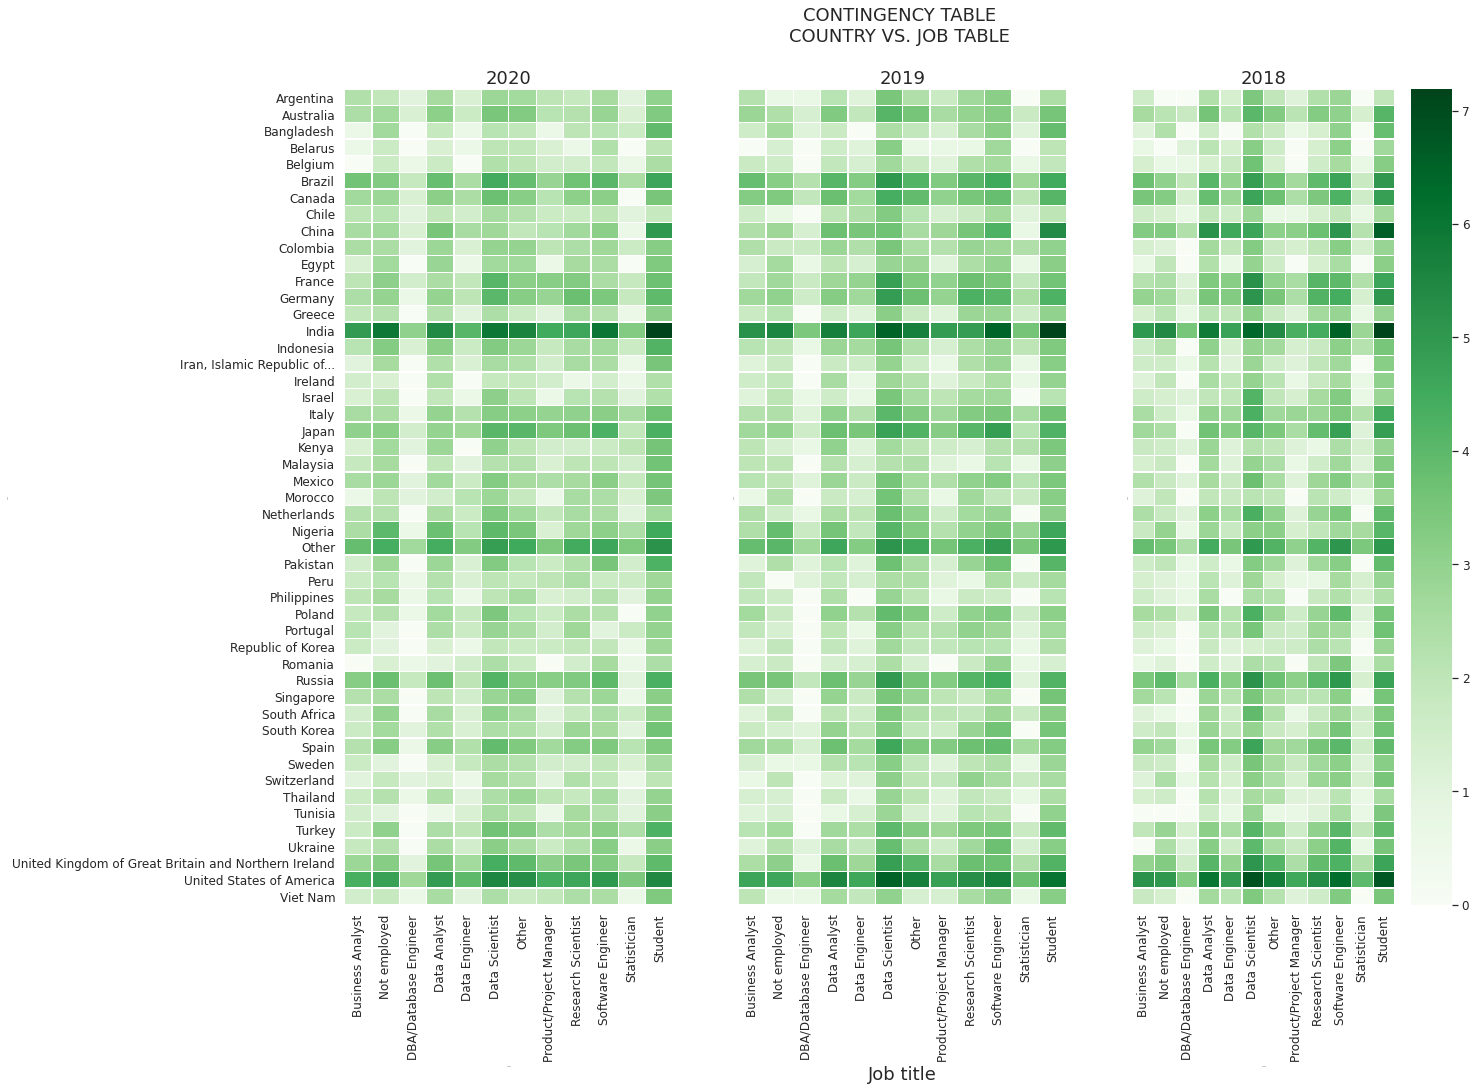

In [27]:
sns.set(font_scale=1.1)
plt.figure(figsize=(20,15))
ax1 = plt.subplot(131)
ax1 = sns.heatmap(ww20, cmap=style1, 
           linewidth=0.3, cbar=False);
ax1.set_ylabel('Country',fontsize=0)
ax1.set_xlabel('Job title',fontsize=0)
# title
ax1.set_title('2020',fontsize=18)
#plt.title(title, loc='left',fontsize=18)

ax2 = plt.subplot(132, sharey=ax1)
ax2 = sns.heatmap(ww19, cmap=style1, 
           linewidth=0.3, cbar=False);
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('Country',fontsize=0)
ax2.set_xlabel('Job title',fontsize=18)
# title
ax2.set_title('CONTINGENCY TABLE \nCOUNTRY VS. JOB TABLE \n\n2019',fontsize=18)

ax3 = plt.subplot(133, sharey=ax1)
ax3 = sns.heatmap(ww18, cmap=style1, 
           linewidth=0.3);
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.set_ylabel('Country',fontsize=0)
ax3.set_xlabel('Job title',fontsize=0)
# title
ax3.set_title('2018',fontsize=18);

In this case, 2D observes that worldwide the most common job titles are students and data scientists. In developed countries, as expected, there is more scientific research in the field. To contrast this information, 2D wants to see what relationship exists between job title and level education, independent of the country.

# Job title vs level education

In [28]:
je20 = pd.crosstab(df20.Q5, df20.Q4)
je20.rename(columns = {'Some college/university study without earning a bachelor’s degree':'Without bachelor degree'}, inplace = True)
je20 = je20.drop(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'], axis=1)
je20 = je20.drop(['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'],axis=0)
je20 = je20.T
je20.rename(columns = {'Currently not employed':'Not employed'}, inplace = True)
je20 = je20.drop(['Machine Learning Engineer'],axis=1)
je19 = pd.crosstab(df19.Q5, df19.Q4)
je19 = je19.drop(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'],axis=1)
je19.rename(columns = {'Some college/university study without earning a bachelor’s degree':'Without bachelor degree'}, inplace = True)
je19 = je19.drop(['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'], axis=0)
je19 = je19.T
je18 = pd.crosstab(df18.Q6, df18.Q4)
je18 = je18.drop(['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'], axis=0)
je18 = je18.drop(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'],axis=1)
je18.rename(columns = {'Some college/university study without earning a bachelor’s degree':'Without bachelor degree'}, inplace = True)
je18 = je18.T

#log scale for grapic
je20 = np.log(je20+1)
je19 = np.log(je19+1)
je18 = np.log(je18+1)

In [29]:
#mach country in all dataset row
row_ref = je20.columns
je19 = je19[row_ref]
je18 = je18[row_ref]

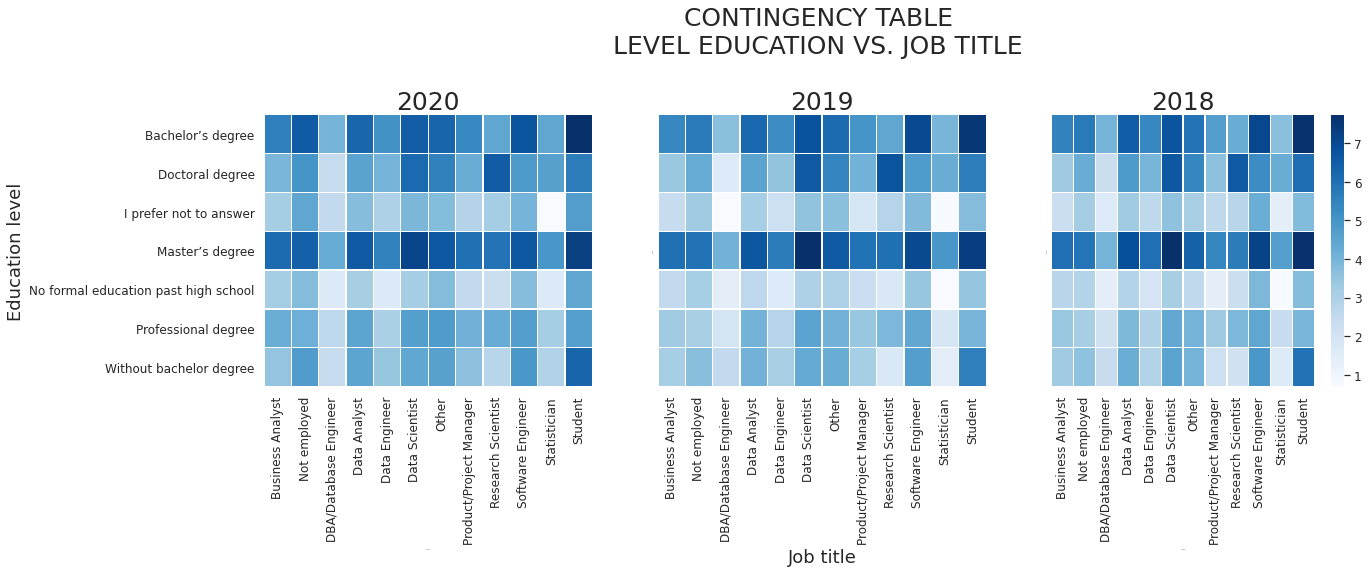

In [30]:
sns.set(font_scale=1.1)
plt.figure(figsize=(20,5))
ax1 = plt.subplot(131)
ax1 = sns.heatmap(je20, cmap=style2, 
           linewidth=0.3, cbar=False);
ax1.set_ylabel('Education level',fontsize=18)
ax1.set_xlabel('Job title',fontsize=0)
# title
ax1.set_title('2020',fontsize=25)
#plt.title(title, loc='left',fontsize=18)

ax2 = plt.subplot(132, sharey=ax1)
ax2 = sns.heatmap(je19, cmap=style2, 
           linewidth=0.3, cbar=False);
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('Country',fontsize=0)
ax2.set_xlabel('Job title',fontsize=18)
# title
ax2.set_title('CONTINGENCY TABLE \nLEVEL EDUCATION VS. JOB TITLE \n\n2019',fontsize=25)

ax3 = plt.subplot(133, sharey=ax1)
ax3 = sns.heatmap(je18, cmap=style2, 
           linewidth=0.3);
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.set_ylabel('Country',fontsize=0)
ax3.set_xlabel('Job title',fontsize=0)
ax3.set_title('2018',fontsize=25);

Here 2D clarifies the information obtained above: it is more probable to find someone without university degrees working in a company with the student title; in the same way for people with a professional degree and non-formal higher education. Doctors and Masters normally serve as data scientists, but doctors as expected, can largely immerse themselves in scientific research. With this contingency table there is a new question for 2D: will there be any **correlation** between the different job titles for people with the levels of education presented in this table?

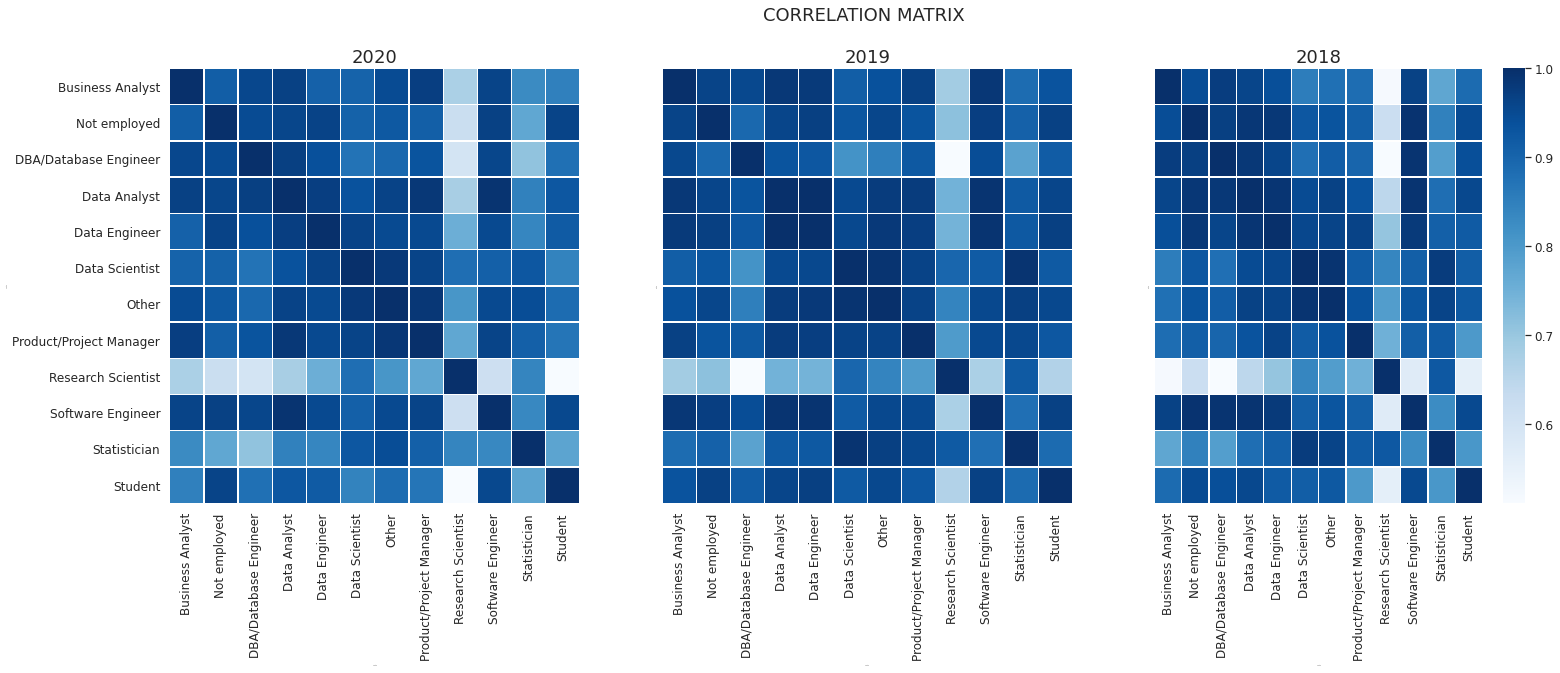

In [31]:
plt.figure(figsize=(25,8))
sns.set(font_scale=1.1)
ax1 = plt.subplot(131)
ax1 = sns.heatmap(je20.corr(),  linewidth=0.3,  cmap=style2,cbar=False);
ax1.set_ylabel('Job title',fontsize=0)
ax1.set_xlabel('Job title',fontsize=0)

# title
ax1.set_title('2020',fontsize=18)
#plt.title(title, loc='left',fontsize=18)

ax2 = plt.subplot(132, sharey=ax1)
ax2 = sns.heatmap(je19.corr(),linewidth=0.3, cmap=style2, cbar=False);
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('Country',fontsize=0)
ax2.set_xlabel('Job title',fontsize=0)
# title
ax2.set_title('CORRELATION MATRIX \n\n2019',fontsize=18)

ax3 = plt.subplot(133, sharey=ax1)
ax3 = sns.heatmap(je18.corr(), linewidth=0.3,cmap=style2);
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.set_ylabel('Country',fontsize=0)
ax3.set_xlabel('Job title',fontsize=0)
ax3.set_title('2018',fontsize=18);

The correlation matrix of the previous contingency table allows 2D to see more clearly the correlation between the job titles. Of particular interest, he observes that there is practically no correlation between the people who work with the degree of students and the scientific researchers (as expected). In the same way, he observes that scientific researchers do mostly work in statistics and data. 2D also evidence that researchers do not work on Bussiness.

With what he has learned so far, 2D pauses and reflects: his age range, his basic studies, and the definition of DS up to this point all match his personal tastes. Is it possible then that his computer skills will be coupled to the mentioned field?

To do this, he decides to ask the oracle about the most used programming languages in the field of DS, both locally and globally

# Most used programming languages

In [32]:
language_18 = pd.DataFrame({'Count': [df18c.Q16_Part_1.value_counts()[0],df18c.Q16_Part_2.value_counts()[0],df18c.Q16_Part_3.value_counts()[0],
                                      df18c.Q16_Part_4.value_counts()[0],df18c.Q16_Part_5.value_counts()[0],df18c.Q16_Part_6.value_counts()[0],
                                      df18c.Q16_Part_7.value_counts()[0],df18c.Q16_Part_8.value_counts()[0],df18c.Q16_Part_9.value_counts()[0],
                                      df18c.Q16_Part_10.value_counts()[0],df18c.Q16_Part_12.value_counts()[0],
                                      df18c.Q16_Part_13.value_counts()[0],df18c.Q16_Part_14.value_counts()[0],df18c.Q16_Part_15.value_counts()[0],
                                      df18c.Q16_Part_16.value_counts()[0],df18c.Q16_Part_17.value_counts()[0],df18c.Q16_Part_18.value_counts()[0]], 
                                      'Programming_Languages': ["Python", "R", "SQL","Bash","Java" ,"Javascript","VBA","C","MATLAB","Scala",
                                       "Go","C#","PHP","Ruby","SAS","None","Other"]},columns=['Count', 'Programming_Languages'])
language_18 = language_18.sort_values('Count',ascending=False)

In [33]:
language_19 = pd.DataFrame({'Count': [df19c.Q18_Part_1.value_counts()[0],df19c.Q18_Part_2.value_counts()[0],df19c.Q18_Part_3.value_counts()[0],
                         df19c.Q18_Part_4.value_counts()[0],df19c.Q18_Part_5.value_counts()[0],df19c.Q18_Part_6.value_counts()[0],
                         df19c.Q18_Part_7.value_counts()[0],df19c.Q18_Part_8.value_counts()[0],df19c.Q18_Part_9.value_counts()[0],
                         df19c.Q18_Part_10.value_counts()[0],df19c.Q18_Part_11.value_counts()[0],df19c.Q18_Part_12.value_counts()[0]], 'Programming_Languages': ["Python", "R", "SQL","C","C++","Java","Javascript",
                                                                                  "TypeScript","Bash","MATLAB","None","Other"]}, 
                  columns=['Count', 'Programming_Languages'])
language_19 = language_19.sort_values('Count',ascending=False)

In [34]:
language_20 = pd.DataFrame({'Count': [df20c.Q7_Part_1.value_counts()[0],df20c.Q7_Part_2.value_counts()[0],df20c.Q7_Part_3.value_counts()[0],
                         df20c.Q7_Part_4.value_counts()[0],df20c.Q7_Part_5.value_counts()[0],df20c.Q7_Part_6.value_counts()[0],
                         df20c.Q7_Part_7.value_counts()[0],df20c.Q7_Part_8.value_counts()[0],df20c.Q7_Part_9.value_counts()[0],
                         df20c.Q7_Part_10.value_counts()[0],df20c.Q7_Part_11.value_counts()[0],df20c.Q7_Part_12.value_counts()[0],
                         df20c.Q7_OTHER.value_counts()[0]], 'Programming_Languages': ["Python", "R", "SQL","C","C++","Java","Javascript",
                                                                                  "Julia","Swift","Bash","MATLAB","None","Other"]}, 
                  columns=['Count', 'Programming_Languages'])
language_20 = language_20.sort_values('Count',ascending=False)

In [35]:
language_18['year'] = 2018
language_19['year'] = 2019
language_20['year'] = 2020
language_c = pd.concat([language_18, language_19,language_20])

In [36]:
fig = go.Figure(data=[
    go.Bar(name='2018', x=language_18['Programming_Languages'], y=language_18['Count'], marker_color = color18),
    go.Bar(name='2019', x=language_19['Programming_Languages'], y=language_19['Count'], marker_color = color19),
    go.Bar(name='2020', x=language_20['Programming_Languages'], y=language_20['Count'], marker_color = color20)    
])
# Change the bar mode
fig.update_layout(
    title='Most used programming languages in Colombia',
    xaxis = dict(
        title='Programming Language',
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.90,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

Seeing this result, 2D jumps with joy, because without a doubt Python is the most used language by the people surveyed. But this is not the only thing that excites him.He also sees that SQL is in the top 3 of the most used languages and as time passes, the number of users increases. With these clear conclusions, 2D reviews the same results globally:

In [37]:
lang_20 = pd.DataFrame({'Count': [df20.Q7_Part_1.value_counts()[0],df20.Q7_Part_2.value_counts()[0],df20.Q7_Part_3.value_counts()[0],
                         df20.Q7_Part_4.value_counts()[0],df20.Q7_Part_5.value_counts()[0],df20.Q7_Part_6.value_counts()[0],
                         df20.Q7_Part_7.value_counts()[0],df20.Q7_Part_8.value_counts()[0],df20.Q7_Part_9.value_counts()[0],
                         df20.Q7_Part_10.value_counts()[0],df20.Q7_Part_11.value_counts()[0],df20.Q7_Part_12.value_counts()[0],
                         df20.Q7_OTHER.value_counts()[0]], 'Programming_Languages': ["Python", "R", "SQL","C","C++","Java","Javascript",
                                                                                  "Julia","Swift","Bash","MATLAB","None","Other"]}, 
                  columns=['Count', 'Programming_Languages'])
lang_20 = lang_20.sort_values('Count',ascending=False)

lang_19 = pd.DataFrame({'Count': [df19.Q18_Part_1.value_counts()[0],df19.Q18_Part_2.value_counts()[0],df19.Q18_Part_3.value_counts()[0],
                         df19.Q18_Part_4.value_counts()[0],df19.Q18_Part_5.value_counts()[0],df19.Q18_Part_6.value_counts()[0],
                         df19.Q18_Part_7.value_counts()[0],df19.Q18_Part_8.value_counts()[0],df19.Q18_Part_9.value_counts()[0],
                         df19.Q18_Part_10.value_counts()[0],df19.Q18_Part_11.value_counts()[0],df19.Q18_Part_12.value_counts()[0]], 'Programming_Languages': ["Python", "R", "SQL","C","C++","Java","Javascript",
                                                                                  "TypeScript","Bash","MATLAB","None","Other"]}, 
                  columns=['Count', 'Programming_Languages'])
lang_19= lang_19.sort_values('Count',ascending=False)


lang_18 = pd.DataFrame({'Count': [df18.Q16_Part_1.value_counts()[0],df18.Q16_Part_2.value_counts()[0],df18.Q16_Part_3.value_counts()[0],
                                      df18.Q16_Part_4.value_counts()[0],df18.Q16_Part_5.value_counts()[0],df18.Q16_Part_6.value_counts()[0],
                                      df18.Q16_Part_7.value_counts()[0],df18.Q16_Part_8.value_counts()[0],df18.Q16_Part_9.value_counts()[0],
                                      df18.Q16_Part_10.value_counts()[0],df18.Q16_Part_12.value_counts()[0],
                                      df18.Q16_Part_13.value_counts()[0],df18.Q16_Part_14.value_counts()[0],df18.Q16_Part_15.value_counts()[0],
                                      df18.Q16_Part_16.value_counts()[0],df18.Q16_Part_17.value_counts()[0],df18.Q16_Part_18.value_counts()[0]], 
                                      'Programming_Languages': ["Python", "R", "SQL","Bash","Java" ,"Javascript","VBA","C","MATLAB","Scala",
                                       "Go","C#","PHP","Ruby","SAS","None","Other"]},columns=['Count', 'Programming_Languages'])

lang_18 = lang_18.sort_values('Count',ascending=False)


In [38]:
fig = go.Figure(data=[
    go.Bar(name='2018', x=lang_18['Programming_Languages'], y=lang_18['Count'], marker_color = color18),
    go.Bar(name='2019', x=lang_19['Programming_Languages'], y=lang_19['Count'], marker_color = color19),
    go.Bar(name='2020', x=lang_20['Programming_Languages'], y=lang_20['Count'], marker_color = color20)
    
    
])
# Change the bar mode
fig.update_layout(
    title='Most used programming languages worldwide',
    xaxis = dict(
        title='Programming Language',
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.90,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

2D is still excited, because regardless of the country, Python is the most used programming language, and SQL continues in the top 3.

# Framework vs. Job title and Framework vs. Education level for 2020 in Colombia

In [39]:
skc = pd.DataFrame(df20c.groupby('Q16_Part_1').get_group('  Scikit-learn ').Q5.value_counts())
skc = skc.rename_axis('Job title').reset_index()
skc.rename(columns = {'Q5':'Scikit-learn'}, inplace = True) 
tfc = pd.DataFrame(df20c.groupby('Q16_Part_2').get_group('  TensorFlow ').Q5.value_counts())
tfc = tfc.rename_axis('Job title').reset_index()
tfc.rename(columns = {'Q5':'TensorFlow'}, inplace = True) 
skc['TensorFlow'] = tfc['TensorFlow']
krc = pd.DataFrame(df20c.groupby('Q16_Part_3').get_group(' Keras ').Q5.value_counts())
krc = krc.rename_axis('Job title').reset_index()
krc.rename(columns = {'Q5':'Keras'}, inplace = True)
skc["Keras"] = krc['Keras']
pyc = df20c.groupby('Q16_Part_4').get_group(' PyTorch ').Q5.value_counts()
pyc = pyc.rename_axis('Job title').reset_index()
pyc.rename(columns = {'Q5':'PyTorch'}, inplace = True)
skc["PyTorch"] = pyc['PyTorch']
fac = df20c.groupby('Q16_Part_5').get_group(' Fast.ai ').Q5.value_counts()
fac = fac.rename_axis('Job title').reset_index()
fac.rename(columns = {'Q5':'Fast.ai'}, inplace = True)
skc["Fast.ai"] = fac['Fast.ai']
xgc = df20c.groupby('Q16_Part_7').get_group(' Xgboost ').Q5.value_counts()
xgc = xgc.rename_axis('Job title').reset_index()
xgc.rename(columns = {'Q5':'Xgboost'}, inplace = True)
skc["Xgboost"] = xgc['Xgboost']
lic = df20c.groupby('Q16_Part_8').get_group(' LightGBM ').Q5.value_counts()
lic = lic.rename_axis('Job title').reset_index()
lic.rename(columns = {'Q5':'LightGBM '}, inplace = True)
skc["LightGBM "] = lic['LightGBM ']
cac = df20c.groupby('Q16_Part_9').get_group(' CatBoost ').Q5.value_counts()
cac = cac.rename_axis('Job title').reset_index()
cac.rename(columns = {'Q5':'CatBoost '}, inplace = True)
skc["CatBoost "] = cac['CatBoost ']
prc = df20c.groupby('Q16_Part_10').get_group(' Prophet ').Q5.value_counts()
prc= prc.rename_axis('Job title').reset_index()
prc.rename(columns = {'Q5':' Prophet'}, inplace = True)
skc["Prophet "] = prc[' Prophet']
h2c = df20c.groupby('Q16_Part_11').get_group(' H2O 3 ').Q5.value_counts()
h2c = h2c.rename_axis('Job title').reset_index()
h2c.rename(columns = {'Q5':'H2O 3'}, inplace = True)
skc["H2O 3"] = h2c['H2O 3']
carc = df20c.groupby('Q16_Part_12').get_group(' Caret ').Q5.value_counts()
carc = carc.rename_axis('Job title').reset_index()
carc.rename(columns = {'Q5':'Caret'}, inplace = True)
skc["Caret"] = carc['Caret']
skc.rename(index={0:'Student',1:'Data Scientist',2:'Software Engineer',3:'Currently not employed',4 :'Other', 
                5:'Machine Learning Engineer',6:'Data Analyst',7:'Research Scientist',8:'Business Analyst',9:'Product/Project Manager',
                10:'Data Engineer',11:'Statistician',12:'DBA/Database Engineer'}, inplace=True)
skc= skc.drop(['Job title'],axis=1)
skc = np.log(skc+1)

In [40]:
skec = pd.DataFrame(df20c.groupby('Q16_Part_1').get_group('  Scikit-learn ').Q4.value_counts())
skec = skec.rename_axis('Job title').reset_index()
skec.rename(columns = {'Q4':'Scikit-learn'}, inplace = True) 
tfec = pd.DataFrame(df20.groupby('Q16_Part_2').get_group('  TensorFlow ').Q4.value_counts())
tfec = tfec.rename_axis('Job title').reset_index()
tfec.rename(columns = {'Q4':'TensorFlow'}, inplace = True) 
skec['TensorFlow'] = tfec['TensorFlow']
krec = pd.DataFrame(df20c.groupby('Q16_Part_3').get_group(' Keras ').Q4.value_counts())
krec = krec.rename_axis('Job title').reset_index()
krec.rename(columns = {'Q4':'Keras'}, inplace = True)
skec["Keras"] = krec['Keras']
pyec = df20c.groupby('Q16_Part_4').get_group(' PyTorch ').Q4.value_counts()
pyec = pyec.rename_axis('Job title').reset_index()
pyec.rename(columns = {'Q4':'PyTorch'}, inplace = True)
skec["PyTorch"] = pyec['PyTorch']
faec = df20c.groupby('Q16_Part_5').get_group(' Fast.ai ').Q4.value_counts()
faec = faec.rename_axis('Job title').reset_index()
faec.rename(columns = {'Q4':'Fast.ai'}, inplace = True)
skec["Fast.ai"] = faec['Fast.ai']
xgec = df20c.groupby('Q16_Part_7').get_group(' Xgboost ').Q4.value_counts()
xgec = xgec.rename_axis('Job title').reset_index()
xgec.rename(columns = {'Q4':'Xgboost'}, inplace = True)
skec["Xgboost"] = xgec['Xgboost']
liec = df20c.groupby('Q16_Part_8').get_group(' LightGBM ').Q4.value_counts()
liec = liec.rename_axis('Job title').reset_index()
liec.rename(columns = {'Q4':'LightGBM '}, inplace = True)
skec["LightGBM "] = liec['LightGBM ']
caec = df20c.groupby('Q16_Part_9').get_group(' CatBoost ').Q4.value_counts()
caec = caec.rename_axis('Job title').reset_index()
caec.rename(columns = {'Q4':'CatBoost '}, inplace = True)
skec["CatBoost "] = caec['CatBoost ']
prec = df20c.groupby('Q16_Part_10').get_group(' Prophet ').Q4.value_counts()
prec = prec.rename_axis('Job title').reset_index()
prec.rename(columns = {'Q4':' Prophet'}, inplace = True)
skec["Prophet "] = prec[' Prophet']
h2ec = df20c.groupby('Q16_Part_11').get_group(' H2O 3 ').Q4.value_counts()
h2ec = h2ec.rename_axis('Job title').reset_index()
h2ec.rename(columns = {'Q4':'H2O 3'}, inplace = True)
skec["H2O 3"] = h2ec['H2O 3']
carec = df20c.groupby('Q16_Part_12').get_group(' Caret ').Q4.value_counts()
carec = carec.rename_axis('Job title').reset_index()
carec.rename(columns = {'Q4':'Caret'}, inplace = True)
skec["Caret"] = carec['Caret']
skec.rename(index={0:'Master’s degree',1:'Bachelor’s degree',2:'Doctoral degree',3:'Without bachelor degree',4 :'Professional degree', 
                5:'I prefer not to answer',6:'No formal education past high school'}, inplace=True)
s2c= skec.drop(['Job title'],axis=1)
s2c = np.log(s2c+1)

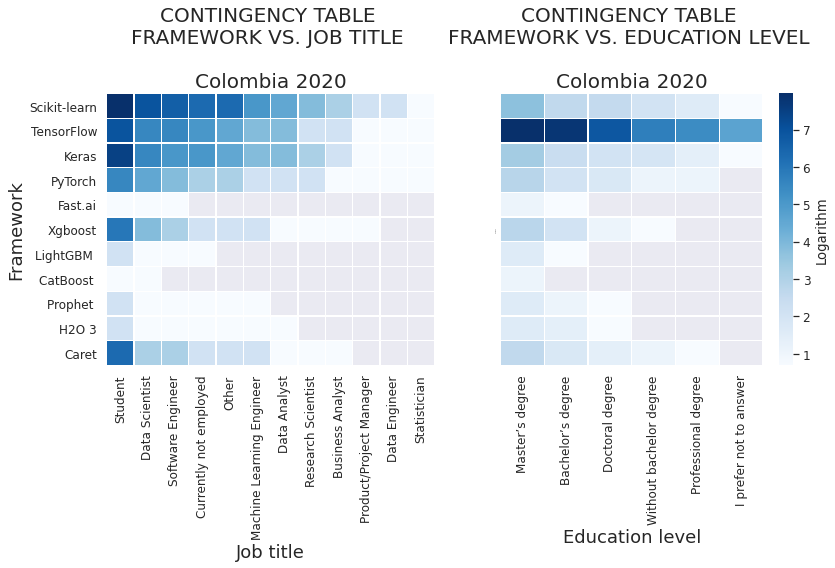

In [41]:
sns.set(font_scale=1.1)
plt.figure(figsize=(20,5))
ax1 = plt.subplot(131)
ax1 = sns.heatmap(skc.T, cmap=style2, 
           linewidth=0.3, cbar=False);
ax1.set_ylabel('Framework',fontsize=18)
ax1.set_xlabel('Job title',fontsize=18)
# title
ax1.set_title('CONTINGENCY TABLE \nFRAMEWORK VS. JOB TITLE \n\nColombia 2020',fontsize=20)
#plt.title(title, loc='left',fontsize=18)

ax2 = plt.subplot(132, sharey=ax1)
ax2 = sns.heatmap(s2c.T, cmap=style2, 
           linewidth=0.3, cbar_kws={'label': 'Logarithm'});
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('Framework',fontsize=0)
ax2.set_xlabel('Education level',fontsize=18)
# title
ax2.set_title('CONTINGENCY TABLE \nFRAMEWORK VS. EDUCATION LEVEL \n\nColombia 2020',fontsize=20);

In the previous table, 2D has discovered that if he wants to get a job in Colombia as a student or data scientist, the main frameworks that he must master are: Scikit-learn, TensorFlow, Keras and Xgboost. This news brings him joy and also an objective in which to apply his time to have a great Curriculum Vitae in these lines of work. He also realizes that people with a higher educational level prefer TensorFlow framework, over other options and with this he decides to verify if these conclusions remain worldwide.

# Framework vs. Job title and Framework vs. Education level for 2020 worldwide

In [42]:
# Job title vs. Framework DataFrame building
sk = pd.DataFrame(df20.groupby('Q16_Part_1').get_group('  Scikit-learn ').Q5.value_counts())
sk = sk.rename_axis('Job title').reset_index()
sk.rename(columns = {'Q5':'Scikit-learn'}, inplace = True) 
tf = pd.DataFrame(df20.groupby('Q16_Part_2').get_group('  TensorFlow ').Q5.value_counts())
tf = tf.rename_axis('Job title').reset_index()
tf.rename(columns = {'Q5':'TensorFlow'}, inplace = True) 
sk['TensorFlow'] = tf['TensorFlow']
kr = pd.DataFrame(df20.groupby('Q16_Part_3').get_group(' Keras ').Q5.value_counts())
kr = kr.rename_axis('Job title').reset_index()
kr.rename(columns = {'Q5':'Keras'}, inplace = True)
sk["Keras"] = kr['Keras']
py = df20.groupby('Q16_Part_4').get_group(' PyTorch ').Q5.value_counts()
py = py.rename_axis('Job title').reset_index()
py.rename(columns = {'Q5':'PyTorch'}, inplace = True)
sk["PyTorch"] = py['PyTorch']
fa = df20.groupby('Q16_Part_5').get_group(' Fast.ai ').Q5.value_counts()
fa = fa.rename_axis('Job title').reset_index()
fa.rename(columns = {'Q5':'Fast.ai'}, inplace = True)
sk["Fast.ai"] = fa['Fast.ai']
mx = df20.groupby('Q16_Part_6').get_group(' MXNet ').Q5.value_counts()
mx = mx.rename_axis('Job title').reset_index()
mx.rename(columns = {'Q5':'MXNet'}, inplace = True)
sk["MXNet"] = mx['MXNet']
xg = df20.groupby('Q16_Part_7').get_group(' Xgboost ').Q5.value_counts()
xg = xg.rename_axis('Job title').reset_index()
xg.rename(columns = {'Q5':'Xgboost'}, inplace = True)
sk["Xgboost"] = xg['Xgboost']
li = df20.groupby('Q16_Part_8').get_group(' LightGBM ').Q5.value_counts()
li = li.rename_axis('Job title').reset_index()
li.rename(columns = {'Q5':'LightGBM '}, inplace = True)
sk["LightGBM "] = li['LightGBM ']
ca = df20.groupby('Q16_Part_9').get_group(' CatBoost ').Q5.value_counts()
ca = ca.rename_axis('Job title').reset_index()
ca.rename(columns = {'Q5':'CatBoost '}, inplace = True)
sk["CatBoost "] = ca['CatBoost ']
pr = df20.groupby('Q16_Part_10').get_group(' Prophet ').Q5.value_counts()
pr = pr.rename_axis('Job title').reset_index()
pr.rename(columns = {'Q5':' Prophet'}, inplace = True)
sk["Prophet "] = pr[' Prophet']
h2 = df20.groupby('Q16_Part_11').get_group(' H2O 3 ').Q5.value_counts()
h2 = h2.rename_axis('Job title').reset_index()
h2.rename(columns = {'Q5':'H2O 3'}, inplace = True)
sk["H2O 3"] = h2['H2O 3']
car = df20.groupby('Q16_Part_12').get_group(' Caret ').Q5.value_counts()
car = car.rename_axis('Job title').reset_index()
car.rename(columns = {'Q5':'Caret'}, inplace = True)
sk["Caret"] = car['Caret']
sk.rename(index={0:'Student',1:'Data Scientist',2:'Software Engineer',3:'Currently not employed',4 :'Other', 
                5:'Machine Learning Engineer',6:'Data Analyst',7:'Research Scientist',8:'Business Analyst',9:'Product/Project Manager',
                10:'Data Engineer',11:'Statistician',12:'DBA/Database Engineer'}, inplace=True)
sk= sk.drop(['Job title'],axis=1)
sk = np.log(sk+1)

In [43]:
ske = pd.DataFrame(df20.groupby('Q16_Part_1').get_group('  Scikit-learn ').Q4.value_counts())
ske = ske.rename_axis('Job title').reset_index()
ske.rename(columns = {'Q4':'Scikit-learn'}, inplace = True) 
tfe = pd.DataFrame(df20.groupby('Q16_Part_2').get_group('  TensorFlow ').Q4.value_counts())
tfe = tfe.rename_axis('Job title').reset_index()
tfe.rename(columns = {'Q4':'TensorFlow'}, inplace = True) 
ske['TensorFlow'] = tfe['TensorFlow']
kre = pd.DataFrame(df20.groupby('Q16_Part_3').get_group(' Keras ').Q4.value_counts())
kre = kre.rename_axis('Job title').reset_index()
kre.rename(columns = {'Q4':'Keras'}, inplace = True)
ske["Keras"] = kre['Keras']
pye = df20.groupby('Q16_Part_4').get_group(' PyTorch ').Q4.value_counts()
pye = pye.rename_axis('Job title').reset_index()
pye.rename(columns = {'Q4':'PyTorch'}, inplace = True)
ske["PyTorch"] = pye['PyTorch']
fae = df20.groupby('Q16_Part_5').get_group(' Fast.ai ').Q4.value_counts()
fae = fae.rename_axis('Job title').reset_index()
fae.rename(columns = {'Q4':'Fast.ai'}, inplace = True)
ske["Fast.ai"] = fae['Fast.ai']
mxe = df20.groupby('Q16_Part_6').get_group(' MXNet ').Q4.value_counts()
mxe = mxe.rename_axis('Job title').reset_index()
mxe.rename(columns = {'Q4':'MXNet'}, inplace = True)
ske["MXNet"] = mxe['MXNet']
xge = df20.groupby('Q16_Part_7').get_group(' Xgboost ').Q4.value_counts()
xge = xge.rename_axis('Job title').reset_index()
xge.rename(columns = {'Q4':'Xgboost'}, inplace = True)
ske["Xgboost"] = xge['Xgboost']
lie = df20.groupby('Q16_Part_8').get_group(' LightGBM ').Q4.value_counts()
lie = lie.rename_axis('Job title').reset_index()
lie.rename(columns = {'Q4':'LightGBM '}, inplace = True)
ske["LightGBM "] = lie['LightGBM ']
cae = df20.groupby('Q16_Part_9').get_group(' CatBoost ').Q4.value_counts()
cae = cae.rename_axis('Job title').reset_index()
cae.rename(columns = {'Q4':'CatBoost '}, inplace = True)
ske["CatBoost "] = cae['CatBoost ']
pre = df20.groupby('Q16_Part_10').get_group(' Prophet ').Q4.value_counts()
pre = pre.rename_axis('Job title').reset_index()
pre.rename(columns = {'Q4':' Prophet'}, inplace = True)
ske["Prophet "] = pre[' Prophet']
h2e = df20.groupby('Q16_Part_11').get_group(' H2O 3 ').Q4.value_counts()
h2e = h2e.rename_axis('Job title').reset_index()
h2e.rename(columns = {'Q4':'H2O 3'}, inplace = True)
ske["H2O 3"] = h2e['H2O 3']
care = df20.groupby('Q16_Part_12').get_group(' Caret ').Q4.value_counts()
care = care.rename_axis('Job title').reset_index()
care.rename(columns = {'Q4':'Caret'}, inplace = True)
ske["Caret"] = care['Caret']
ske.rename(index={0:'Master’s degree',1:'Bachelor’s degree',2:'Doctoral degree',3:'Without bachelor degree',4 :'Professional degree', 
                5:'I prefer not to answer',6:'No formal education past high school'}, inplace=True)
s2= ske.drop(['Job title'],axis=1)
s2 = np.log(s2+1)

Text(0.5, 1.0, 'CONTINGENCY TABLE \nFRAMEWORK VS. EDUCATION LEVEL \n\nWorldwide 2020')

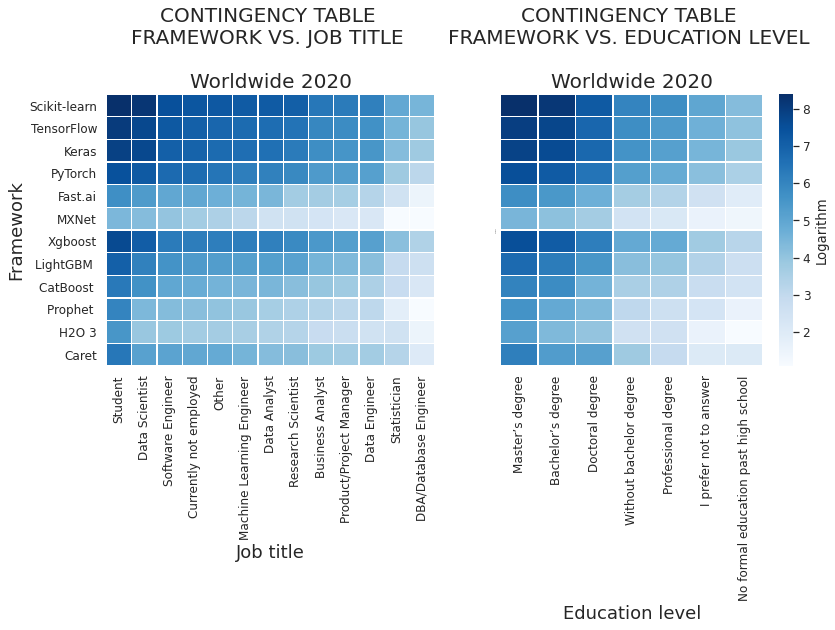

In [44]:
sns.set(font_scale=1.1)
plt.figure(figsize=(20,5))
ax1 = plt.subplot(131)
ax1 = sns.heatmap(sk.T, cmap=style2, 
           linewidth=0.3, cbar=False);
ax1.set_ylabel('Framework',fontsize=18)
ax1.set_xlabel('Job title',fontsize=18)
# title
ax1.set_title('CONTINGENCY TABLE \nFRAMEWORK VS. JOB TITLE \n\nWorldwide 2020',fontsize=20)
#plt.title(title, loc='left',fontsize=18)

ax2 = plt.subplot(132, sharey=ax1)
ax2 = sns.heatmap(s2.T, cmap=style2, 
           linewidth=0.3, cbar_kws={'label': 'Logarithm'});
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('Framework',fontsize=0)
ax2.set_xlabel('Education level',fontsize=18)
# title
ax2.set_title('CONTINGENCY TABLE \nFRAMEWORK VS. EDUCATION LEVEL \n\nWorldwide 2020',fontsize=20)

From the global contingency table, 2D verifies that indeed the frameworks most used in jobs in Colombia are not particular of a country, but are the most frequented worldwide. But there is a different finding with respect to Colombia and it is the following: The most used frameworks at work are also the most used with a university degree, also as a curiosity, it is found that the people surveyed who work with a student degree and use the Caret framework, they mostly have a degree with Master or Doctor.

# ML algorithms vs. Job title and Framework vs. Education level for 2020 in Colombia

In [45]:
lrc = pd.DataFrame(df20c.groupby('Q17_Part_1').get_group('Linear or Logistic Regression').Q5.value_counts())
lrc = lrc.rename_axis('Job title').reset_index()
lrc.rename(columns = {'Q5':'Linear or Logistic Regression'}, inplace = True) 
dtc = pd.DataFrame(df20c.groupby('Q17_Part_2').get_group('Decision Trees or Random Forests').Q5.value_counts())
dtc = dtc.rename_axis('Job title').reset_index()
dtc.rename(columns = {'Q5':'Decision Trees or Random Forests'}, inplace = True) 
lrc['Decision Trees or Random Forests'] = dtc['Decision Trees or Random Forests']
gbc = pd.DataFrame(df20c.groupby('Q17_Part_3').get_group('Gradient Boosting Machines (xgboost, lightgbm, etc)').Q5.value_counts())
gbc = gbc.rename_axis('Job title').reset_index()
gbc.rename(columns = {'Q5':'Gradient Boosting Machines (xgboost, lightgbm, etc)'}, inplace = True) 
lrc['Gradient Boosting Machines'] = gbc['Gradient Boosting Machines (xgboost, lightgbm, etc)']
bac = pd.DataFrame(df20c.groupby('Q17_Part_4').get_group('Bayesian Approaches').Q5.value_counts())
bac = bac.rename_axis('Job title').reset_index()
bac.rename(columns = {'Q5':'Bayesian Approaches'}, inplace = True) 
lrc['Bayesian Approaches'] = bac['Bayesian Approaches']
evc = pd.DataFrame(df20c.groupby('Q17_Part_5').get_group('Evolutionary Approaches').Q5.value_counts())
evc = evc.rename_axis('Job title').reset_index()
evc.rename(columns = {'Q5':'Evolutionary Approaches'}, inplace = True) 
lrc['Evolutionary Approaches'] = evc['Evolutionary Approaches']
dnc = pd.DataFrame(df20c.groupby('Q17_Part_6').get_group('Dense Neural Networks (MLPs, etc)').Q5.value_counts())
dnc = dnc.rename_axis('Job title').reset_index()
dnc.rename(columns = {'Q5':'Dense Neural Networks (MLPs, etc)'}, inplace = True) 
lrc['Dense Neural Networks'] = dnc['Dense Neural Networks (MLPs, etc)']
cnc = pd.DataFrame(df20c.groupby('Q17_Part_7').get_group('Convolutional Neural Networks').Q5.value_counts())
cnc = cnc.rename_axis('Job title').reset_index()
cnc.rename(columns = {'Q5':'Convolutional Neural Networks'}, inplace = True) 
lrc['Convolutional Neural Networks'] = cnc['Convolutional Neural Networks']
gnc = pd.DataFrame(df20c.groupby('Q17_Part_8').get_group('Generative Adversarial Networks').Q5.value_counts())
gnc = gnc.rename_axis('Job title').reset_index()
gnc.rename(columns = {'Q5':'Generative Adversarial Networks'}, inplace = True) 
lrc['Generative Adversarial Networks'] = gnc['Generative Adversarial Networks']
rnc = pd.DataFrame(df20c.groupby('Q17_Part_9').get_group('Recurrent Neural Networks').Q5.value_counts())
rnc = rnc.rename_axis('Job title').reset_index()
rnc.rename(columns = {'Q5':'Recurrent Neural Networks'}, inplace = True) 
lrc['Recurrent Neural Networks'] = rnc['Recurrent Neural Networks']
tnc = pd.DataFrame(df20c.groupby('Q17_Part_10').get_group('Transformer Networks (BERT, gpt-3, etc)').Q5.value_counts())
tnc = tnc.rename_axis('Job title').reset_index()
tnc.rename(columns = {'Q5':'Transformer Networks (BERT, gpt-3, etc)'}, inplace = True) 
lrc['Transformer Networks'] = tnc['Transformer Networks (BERT, gpt-3, etc)']
lrc.rename(index={0:'Student',1:'Data Scientist',2:'Software Engineer',3:'Currently not employed',4 :'Other', 
                5:'Machine Learning Engineer',6:'Data Analyst',7:'Research Scientist',8:'Business Analyst',9:'Product/Project Manager',
                10:'Data Engineer',11:'Statistician',12:'DBA/Database Engineer'}, inplace=True)
lrc= lrc.drop(['Job title'],axis=1)
lrc = np.log(lrc+1)

In [46]:
lrec = pd.DataFrame(df20c.groupby('Q17_Part_1').get_group('Linear or Logistic Regression').Q4.value_counts())
lrec = lrec.rename_axis('Job title').reset_index()
lrec.rename(columns = {'Q4':'Linear or Logistic Regression'}, inplace = True) 
dtec = pd.DataFrame(df20c.groupby('Q17_Part_2').get_group('Decision Trees or Random Forests').Q4.value_counts())
dtec = dtec.rename_axis('Job title').reset_index()
dtec.rename(columns = {'Q4':'Decision Trees or Random Forests'}, inplace = True) 
lrec['Decision Trees or Random Forests'] = dtec['Decision Trees or Random Forests']
gbec = pd.DataFrame(df20c.groupby('Q17_Part_3').get_group('Gradient Boosting Machines (xgboost, lightgbm, etc)').Q4.value_counts())
gbec = gbec.rename_axis('Job title').reset_index()
gbec.rename(columns = {'Q4':'Gradient Boosting Machines (xgboost, lightgbm, etc)'}, inplace = True) 
lrec['Gradient Boosting Machines'] = gbec['Gradient Boosting Machines (xgboost, lightgbm, etc)']
baec = pd.DataFrame(df20c.groupby('Q17_Part_4').get_group('Bayesian Approaches').Q4.value_counts())
baec = baec.rename_axis('Job title').reset_index()
baec.rename(columns = {'Q4':'Bayesian Approaches'}, inplace = True) 
lrec['Bayesian Approaches'] = baec['Bayesian Approaches']
evec = pd.DataFrame(df20c.groupby('Q17_Part_5').get_group('Evolutionary Approaches').Q4.value_counts())
evec = evec.rename_axis('Job title').reset_index()
evec.rename(columns = {'Q4':'Evolutionary Approaches'}, inplace = True) 
lrec['Evolutionary Approaches'] = evec['Evolutionary Approaches']
dnec = pd.DataFrame(df20c.groupby('Q17_Part_6').get_group('Dense Neural Networks (MLPs, etc)').Q4.value_counts())
dnec = dnec.rename_axis('Job title').reset_index()
dnec.rename(columns = {'Q4':'Dense Neural Networks (MLPs, etc)'}, inplace = True) 
lrec['Dense Neural Networks'] = dnec['Dense Neural Networks (MLPs, etc)']
cnec = pd.DataFrame(df20c.groupby('Q17_Part_7').get_group('Convolutional Neural Networks').Q4.value_counts())
cnec = cnec.rename_axis('Job title').reset_index()
cnec.rename(columns = {'Q4':'Convolutional Neural Networks'}, inplace = True) 
lrec['Convolutional Neural Networks'] = cnec['Convolutional Neural Networks']
gnec = pd.DataFrame(df20c.groupby('Q17_Part_8').get_group('Generative Adversarial Networks').Q4.value_counts())
gnec = gnec.rename_axis('Job title').reset_index()
gnec.rename(columns = {'Q4':'Generative Adversarial Networks'}, inplace = True) 
lrec['Generative Adversarial Networks'] = gnec['Generative Adversarial Networks']
rnec = pd.DataFrame(df20c.groupby('Q17_Part_9').get_group('Recurrent Neural Networks').Q4.value_counts())
rnec = rnec.rename_axis('Job title').reset_index()
rnec.rename(columns = {'Q4':'Recurrent Neural Networks'}, inplace = True) 
lrec['Recurrent Neural Networks'] = rnec['Recurrent Neural Networks']
tnec = pd.DataFrame(df20c.groupby('Q17_Part_10').get_group('Transformer Networks (BERT, gpt-3, etc)').Q4.value_counts())
tnec = tnec.rename_axis('Job title').reset_index()
tnec.rename(columns = {'Q4':'Transformer Networks (BERT, gpt-3, etc)'}, inplace = True) 
lrec['Transformer Networks'] = tnec['Transformer Networks (BERT, gpt-3, etc)']
lrec.rename(index={0:'Master’s degree',1:'Bachelor’s degree',2:'Doctoral degree',3:'Without bachelor degree',4 :'Professional degree', 
                5:'I prefer not to answer',6:'No formal education past high school'}, inplace=True)
lr2c = lrec.drop(['Job title'],axis=1)
lr2c = np.log(lr2c+1)

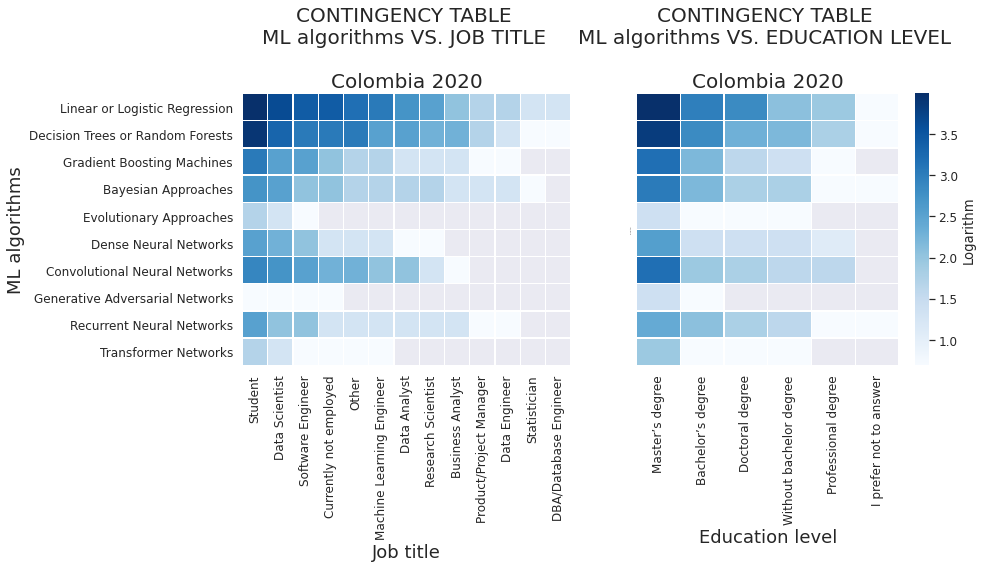

In [47]:
sns.set(font_scale=1.1)
plt.figure(figsize=(20,5))
ax1 = plt.subplot(131)
ax1 = sns.heatmap(lrc.T, cmap=style2, 
           linewidth=0.3, cbar=False);
ax1.set_ylabel('ML algorithms',fontsize=18);
ax1.set_xlabel('Job title',fontsize=18);
# title
ax1.set_title('CONTINGENCY TABLE \nML algorithms VS. JOB TITLE \n\nColombia 2020',fontsize=20);
#plt.title(title, loc='left',fontsize=18)

ax2 = plt.subplot(132, sharey=ax1)
ax2 = sns.heatmap(lr2c.T, cmap=style2, 
           linewidth=0.3, cbar_kws={'label': 'Logarithm'});
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('ML algorithms',fontsize=0)
ax2.set_xlabel('Education level',fontsize=18)
# title
ax2.set_title('CONTINGENCY TABLE \nML algorithms VS. EDUCATION LEVEL \n\nColombia 2020',fontsize=20);

2D glimpses with his question very valuable information. The table tells him that the most common algorithms used in the jobs are: Lineal Regression, Decision Tree, Gradient Boosting and Convolutional Neural Networks. He recognizes in its result two important aspects: a considerable number of people with a Master's degree frequently work with algorithms from the Convolutional Neural Network and Transformer Networks, which is a recent technology only used by a group of Masters who work as students or DS. With these results, he verifies how it is globally.

# ML algorithms vs. Job title and Framework vs. Education level for 2020 worldwide

In [48]:
lr = pd.DataFrame(df20.groupby('Q17_Part_1').get_group('Linear or Logistic Regression').Q5.value_counts())
lr = lr.rename_axis('Job title').reset_index()
lr.rename(columns = {'Q5':'Linear or Logistic Regression'}, inplace = True) 
dt = pd.DataFrame(df20.groupby('Q17_Part_2').get_group('Decision Trees or Random Forests').Q5.value_counts())
dt = dt.rename_axis('Job title').reset_index()
dt.rename(columns = {'Q5':'Decision Trees or Random Forests'}, inplace = True) 
lr['Decision Trees or Random Forests'] = dt['Decision Trees or Random Forests']
gb = pd.DataFrame(df20.groupby('Q17_Part_3').get_group('Gradient Boosting Machines (xgboost, lightgbm, etc)').Q5.value_counts())
gb = gb.rename_axis('Job title').reset_index()
gb.rename(columns = {'Q5':'Gradient Boosting Machines (xgboost, lightgbm, etc)'}, inplace = True) 
lr['Gradient Boosting Machines'] = gb['Gradient Boosting Machines (xgboost, lightgbm, etc)']
ba = pd.DataFrame(df20.groupby('Q17_Part_4').get_group('Bayesian Approaches').Q5.value_counts())
ba = ba.rename_axis('Job title').reset_index()
ba.rename(columns = {'Q5':'Bayesian Approaches'}, inplace = True) 
lr['Bayesian Approaches'] = ba['Bayesian Approaches']
ev = pd.DataFrame(df20.groupby('Q17_Part_5').get_group('Evolutionary Approaches').Q5.value_counts())
ev = ev.rename_axis('Job title').reset_index()
ev.rename(columns = {'Q5':'Evolutionary Approaches'}, inplace = True) 
lr['Evolutionary Approaches'] = ev['Evolutionary Approaches']
dn = pd.DataFrame(df20.groupby('Q17_Part_6').get_group('Dense Neural Networks (MLPs, etc)').Q5.value_counts())
dn = dn.rename_axis('Job title').reset_index()
dn.rename(columns = {'Q5':'Dense Neural Networks (MLPs, etc)'}, inplace = True) 
lr['Dense Neural Networks'] = dn['Dense Neural Networks (MLPs, etc)']
cn = pd.DataFrame(df20.groupby('Q17_Part_7').get_group('Convolutional Neural Networks').Q5.value_counts())
cn = cn.rename_axis('Job title').reset_index()
cn.rename(columns = {'Q5':'Convolutional Neural Networks'}, inplace = True) 
lr['Convolutional Neural Networks'] = cn['Convolutional Neural Networks']
gn = pd.DataFrame(df20.groupby('Q17_Part_8').get_group('Generative Adversarial Networks').Q5.value_counts())
gn = gn.rename_axis('Job title').reset_index()
gn.rename(columns = {'Q5':'Generative Adversarial Networks'}, inplace = True) 
lr['Generative Adversarial Networks'] = gn['Generative Adversarial Networks']
rn = pd.DataFrame(df20.groupby('Q17_Part_9').get_group('Recurrent Neural Networks').Q5.value_counts())
rn = rn.rename_axis('Job title').reset_index()
rn.rename(columns = {'Q5':'Recurrent Neural Networks'}, inplace = True) 
lr['Recurrent Neural Networks'] = rn['Recurrent Neural Networks']
tn = pd.DataFrame(df20.groupby('Q17_Part_10').get_group('Transformer Networks (BERT, gpt-3, etc)').Q5.value_counts())
tn = tn.rename_axis('Job title').reset_index()
tn.rename(columns = {'Q5':'Transformer Networks (BERT, gpt-3, etc)'}, inplace = True) 
lr['Transformer Networks'] = tn['Transformer Networks (BERT, gpt-3, etc)']
lr.rename(index={0:'Student',1:'Data Scientist',2:'Software Engineer',3:'Currently not employed',4 :'Other', 
                5:'Machine Learning Engineer',6:'Data Analyst',7:'Research Scientist',8:'Business Analyst',9:'Product/Project Manager',
                10:'Data Engineer',11:'Statistician',12:'DBA/Database Engineer'}, inplace=True)
lr= lr.drop(['Job title'],axis=1)
lr = np.log(lr+1)

In [49]:
lre = pd.DataFrame(df20.groupby('Q17_Part_1').get_group('Linear or Logistic Regression').Q4.value_counts())
lre = lre.rename_axis('Job title').reset_index()
lre.rename(columns = {'Q4':'Linear or Logistic Regression'}, inplace = True) 
dte = pd.DataFrame(df20.groupby('Q17_Part_2').get_group('Decision Trees or Random Forests').Q4.value_counts())
dte = dte.rename_axis('Job title').reset_index()
dte.rename(columns = {'Q4':'Decision Trees or Random Forests'}, inplace = True) 
lre['Decision Trees or Random Forests'] = dte['Decision Trees or Random Forests']
gbe = pd.DataFrame(df20.groupby('Q17_Part_3').get_group('Gradient Boosting Machines (xgboost, lightgbm, etc)').Q4.value_counts())
gbe = gbe.rename_axis('Job title').reset_index()
gbe.rename(columns = {'Q4':'Gradient Boosting Machines (xgboost, lightgbm, etc)'}, inplace = True) 
lre['Gradient Boosting Machines'] = gbe['Gradient Boosting Machines (xgboost, lightgbm, etc)']
bae = pd.DataFrame(df20.groupby('Q17_Part_4').get_group('Bayesian Approaches').Q4.value_counts())
bae = bae.rename_axis('Job title').reset_index()
bae.rename(columns = {'Q4':'Bayesian Approaches'}, inplace = True) 
lre['Bayesian Approaches'] = bae['Bayesian Approaches']
eve = pd.DataFrame(df20.groupby('Q17_Part_5').get_group('Evolutionary Approaches').Q4.value_counts())
eve = eve.rename_axis('Job title').reset_index()
eve.rename(columns = {'Q4':'Evolutionary Approaches'}, inplace = True) 
lre['Evolutionary Approaches'] = eve['Evolutionary Approaches']
dne = pd.DataFrame(df20.groupby('Q17_Part_6').get_group('Dense Neural Networks (MLPs, etc)').Q4.value_counts())
dne = dne.rename_axis('Job title').reset_index()
dne.rename(columns = {'Q4':'Dense Neural Networks (MLPs, etc)'}, inplace = True) 
lre['Dense Neural Networks'] = dne['Dense Neural Networks (MLPs, etc)']
cne = pd.DataFrame(df20.groupby('Q17_Part_7').get_group('Convolutional Neural Networks').Q4.value_counts())
cne = cne.rename_axis('Job title').reset_index()
cne.rename(columns = {'Q4':'Convolutional Neural Networks'}, inplace = True) 
lre['Convolutional Neural Networks'] = cne['Convolutional Neural Networks']
gne = pd.DataFrame(df20.groupby('Q17_Part_8').get_group('Generative Adversarial Networks').Q4.value_counts())
gne = gne.rename_axis('Job title').reset_index()
gne.rename(columns = {'Q4':'Generative Adversarial Networks'}, inplace = True) 
lre['Generative Adversarial Networks'] = gne['Generative Adversarial Networks']
rne = pd.DataFrame(df20.groupby('Q17_Part_9').get_group('Recurrent Neural Networks').Q4.value_counts())
rne = rne.rename_axis('Job title').reset_index()
rne.rename(columns = {'Q4':'Recurrent Neural Networks'}, inplace = True) 
lre['Recurrent Neural Networks'] = rne['Recurrent Neural Networks']
tne = pd.DataFrame(df20.groupby('Q17_Part_10').get_group('Transformer Networks (BERT, gpt-3, etc)').Q4.value_counts())
tne = tne.rename_axis('Job title').reset_index()
tne.rename(columns = {'Q4':'Transformer Networks (BERT, gpt-3, etc)'}, inplace = True) 
lre['Transformer Networks'] = tne['Transformer Networks (BERT, gpt-3, etc)']
lre.rename(index={0:'Master’s degree',1:'Bachelor’s degree',2:'Doctoral degree',3:'Without bachelor degree',4 :'Professional degree', 
                5:'I prefer not to answer',6:'No formal education past high school'}, inplace=True)
lr2= lre.drop(['Job title'],axis=1)
lr2 = np.log(lr2+1)

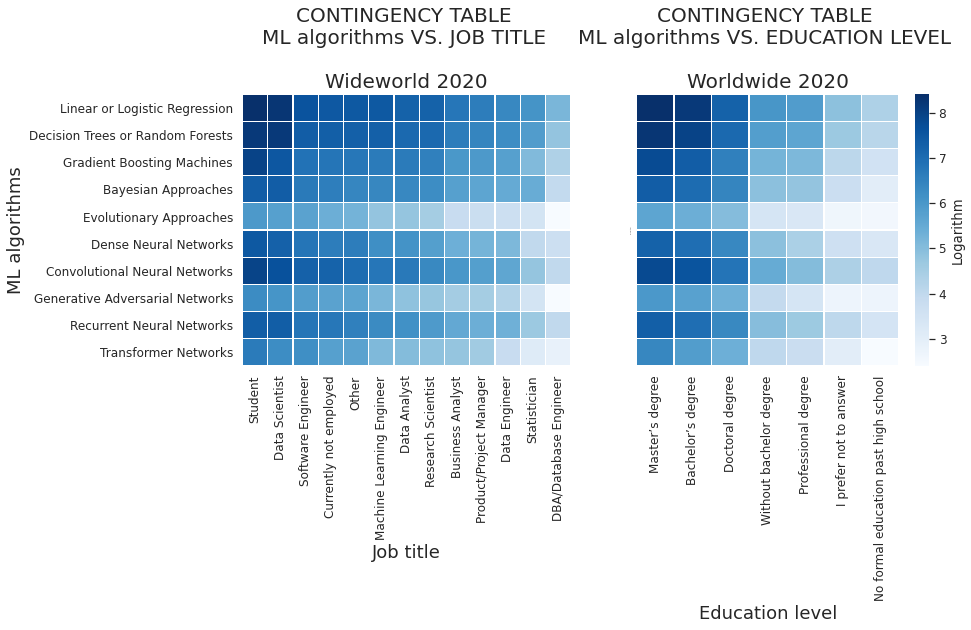

In [50]:
sns.set(font_scale=1.1)
plt.figure(figsize=(20,5))
ax1 = plt.subplot(131)
ax1 = sns.heatmap(lr.T, cmap=style2, 
           linewidth=0.3, cbar=False);
ax1.set_ylabel('ML algorithms',fontsize=18)
ax1.set_xlabel('Job title',fontsize=18)
# title
ax1.set_title('CONTINGENCY TABLE \nML algorithms VS. JOB TITLE \n\nWideworld 2020',fontsize=20)
#plt.title(title, loc='left',fontsize=18)

ax2 = plt.subplot(132, sharey=ax1)
ax2 = sns.heatmap(lr2.T, cmap=style2, 
           linewidth=0.3, cbar_kws={'label': 'Logarithm'});
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('ML algorithms',fontsize=0)
ax2.set_xlabel('Education level',fontsize=18);
# title
ax2.set_title('CONTINGENCY TABLE \nML algorithms VS. EDUCATION LEVEL \n\nWorldwide 2020',fontsize=20);

In this case, 2D quickly observes that the Evolutionary Approaches algorithms are rarely used in jobs and with people with an academic degree.

2D consideres that he has a good basic knowledge about the local and global condition of the job of a DS, in the same way the basic and essential skills for this work. Therefore he desires to inquire about the economic contribution that would be obtained by dedicating itself to this profession.

# Salary

## Salary vs. Education level

In [51]:
s20 = pd.crosstab(df20.Q24, df20.Q4)
s20= s20.drop(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'], axis=1)
s20 = s20.drop(['What is your current yearly compensation (approximate $USD)?'],axis=0)
s20.rename(columns = {'Some college/university study without earning a bachelor’s degree':'Without bachelor degree'}, inplace = True)

s19 = pd.crosstab(df19.Q10, df19.Q4)
s19= s19.drop(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'], axis=1)
s19 = s19.drop(['What is your current yearly compensation (approximate $USD)?'],axis=0)
s19.rename(columns = {'Some college/university study without earning a bachelor’s degree':'Without bachelor degree'}, inplace = True)

s18 = pd.crosstab(df18.Q9, df18.Q4)
s18= s18.drop(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'], axis=1)
s18 = s18.drop(['What is your current yearly compensation (approximate $USD)?'],axis=0)
s18 = s18.drop(['I do not wish to disclose my approximate yearly compensation'],axis=0)
s18.rename(columns = {'Some college/university study without earning a bachelor’s degree':'Without bachelor degree'}, inplace = True)
#log scale for grapic
s20l = np.log(s20+1)
s19l = np.log(s19+1)
s18l = np.log(s18+1)

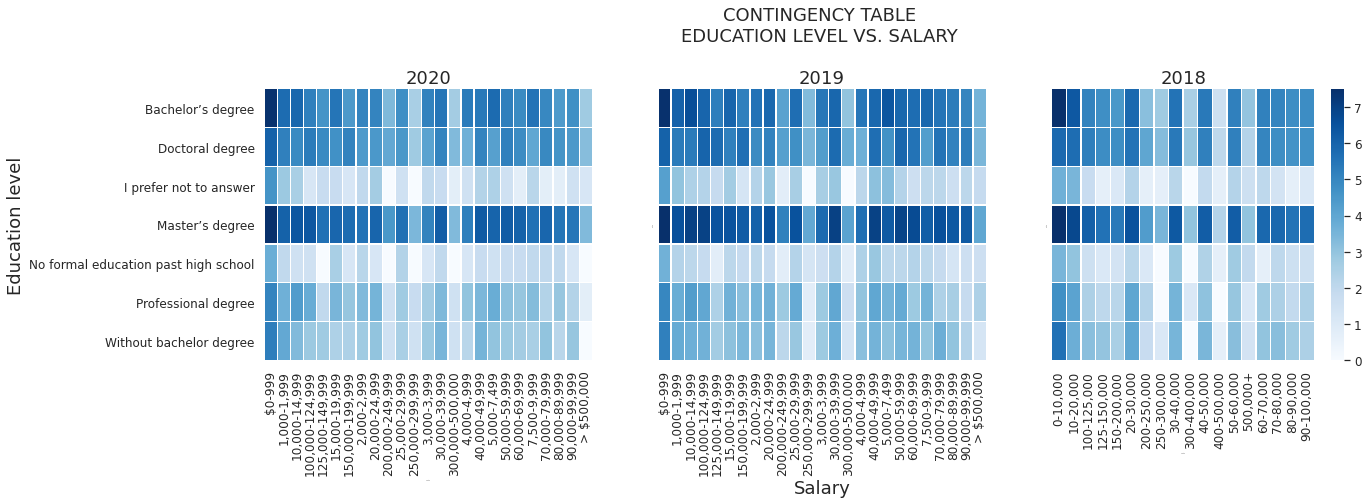

In [52]:
sns.set(font_scale=1.1)
plt.figure(figsize=(20,5))
ax1 = plt.subplot(131)
ax1 = sns.heatmap(s20l.T, cmap=style2, 
           linewidth=0.3, cbar=False);
ax1.set_ylabel('Education level',fontsize=18)
ax1.set_xlabel('Job title',fontsize=0)
# title
ax1.set_title('2020',fontsize=18)
#plt.title(title, loc='left',fontsize=18)

ax2 = plt.subplot(132, sharey=ax1)
ax2 = sns.heatmap(s19l.T, cmap=style2, 
           linewidth=0.3, cbar=False);
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('Country',fontsize=0)
ax2.set_xlabel('Salary',fontsize=18)
# title
ax2.set_title('CONTINGENCY TABLE \nEDUCATION LEVEL VS. SALARY \n\n2019',fontsize=18)

ax3 = plt.subplot(133, sharey=ax1)
ax3 = sns.heatmap(s18l.T, cmap=style2, 
           linewidth=0.3);
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.set_ylabel('Country',fontsize=0)
ax3.set_xlabel('Job title',fontsize=0)
ax3.set_title('2018',fontsize=18);

Apparently, salary does not depend on the academic level, but fortunately 2D remembers how this adventure began, he wanted to implement the Person's method to test his hypothesis: is the academic level independent of the economic remuneration?


## Pearson’s Chi-Squared Test
The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable.

The variables are considered independent if the observed and expected frequencies are similar, that the levels of the variables do not interact, are not dependent.

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

- If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
- If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

- If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
- If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

The degrees of freedom for the chi-squared distribution is calculated based on the size of the contingency table as:

$(rows - 1) \times (cols - 1)$


In [53]:
def hyp_test(contingency, alpha = 0.05):
  '''
  Inputs:
  contingency: contingency table to be resolved
  alpha = significance level (0.05 by default)

  Output:
  This function only prints the result of a hypothesis test. Giving information
  about rejection or acceptance of the null hypothesis:
  Null hypothesis is rejected if variables in contingency table are dependent.
  Null hypothesis is accepted if variables in contingency table are independent.
  '''
  c, p, dof, expected = chi2_contingency(contingency)

  if p < alpha:
    print(f'p-value: {p} is less than significance level: {alpha}')
    print(f'Variables are dependent. Null hypothesis is rejected.')
  else:
    print(f'p-value: {p} is greater than significance level: {alpha}')
    print(f'Variables are independent. Null hypothesis is accepted.')
  
  return None

## Salary vs. Country

In [54]:
sc20 = pd.crosstab(df20.Q24, df20.Q3)

sc20 = sc20.drop(['What is your current yearly compensation (approximate $USD)?'],axis=0)
sc20 = sc20.drop(['In which country do you currently reside?'],axis=1)
sc20 = sc20.drop(['Ghana', 'United Arab Emirates', 'Sri Lanka', 'Nepal', 'Taiwan', 'Saudi Arabia'],axis=1)

sc19 = pd.crosstab(df19.Q10, df19.Q3)
sc19 = sc19.drop(['What is your current yearly compensation (approximate $USD)?'],axis=0)

sc18 = pd.crosstab(df18.Q9, df18.Q3)
sc18 = sc18.drop(['What is your current yearly compensation (approximate $USD)?'],axis=0)
sc18 = sc18.drop(['I do not wish to disclose my approximate yearly compensation'],axis=0)

col_ref = sc20.columns
sc19 = sc19[col_ref]
sc18 = sc18[col_ref]

sc20l = np.log(sc20+1)
sc19l = np.log(sc19+1)
sc18l = np.log(sc18+1)

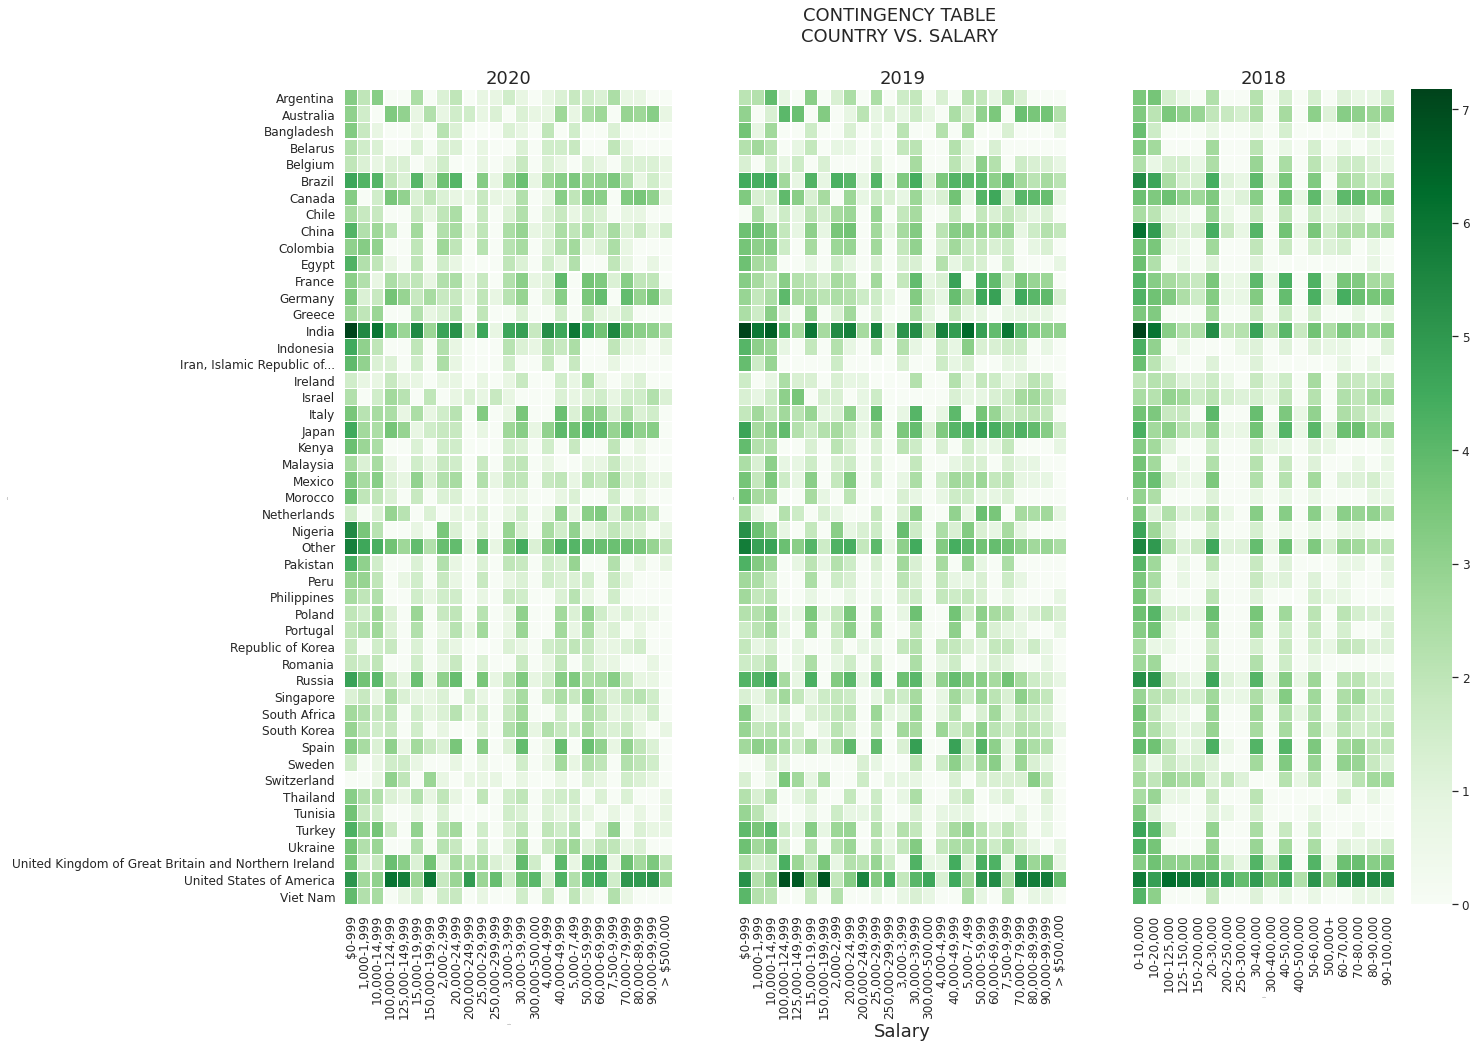

In [55]:
sns.set(font_scale=1.1)
plt.figure(figsize=(20,15))
ax1 = plt.subplot(131)
ax1 = sns.heatmap(sc20l.T, cmap=style1, 
           linewidth=0.3, cbar=False);
ax1.set_ylabel('Country',fontsize=0)
ax1.set_xlabel('Job title',fontsize=0)
# title
ax1.set_title('2020',fontsize=18)
#plt.title(title, loc='left',fontsize=18)

ax2 = plt.subplot(132, sharey=ax1)
ax2 = sns.heatmap(sc19l.T, cmap=style1, 
           linewidth=0.3, cbar=False);
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('Country',fontsize=0)
ax2.set_xlabel('Salary',fontsize=18)
# title
ax2.set_title('CONTINGENCY TABLE \nCOUNTRY VS. SALARY \n\n2019',fontsize=18)

ax3 = plt.subplot(133, sharey=ax1)
ax3 = sns.heatmap(sc18l.T, cmap=style1, 
           linewidth=0.3);
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.set_ylabel('Country',fontsize=0)
ax3.set_xlabel('Job title',fontsize=0)
ax3.set_title('2018',fontsize=18);

In [56]:
hyp_test(sc18)

p-value: 0.0 is less than significance level: 0.05
Variables are dependent. Null hypothesis is rejected.


In [57]:
hyp_test(sc19)

p-value: 0.0 is less than significance level: 0.05
Variables are dependent. Null hypothesis is rejected.


In [58]:
hyp_test(sc20)

p-value: 0.0 is less than significance level: 0.05
Variables are dependent. Null hypothesis is rejected.


With total certainty, 2D can guarantee that the salary depends on the country where someone works, in this case, the economic remuneration in Colombia is not the highest, compared to the highest salaries received in developed countries such as: Australía, Canada, Germany, Japan, Sweden, United Kingdom and United States of America.

Finally, 2D proposes to review if in this work there is equity gender in terms of economic remuneration.

## Salary vs. Gender

In [59]:
sg20 = pd.crosstab(df20.Q2, df20.Q24)
sg19 = pd.crosstab(df19.Q2, df19.Q10)
sg18 = pd.crosstab(df18.Q1, df18.Q9)

sg20 = sg20.drop(['What is your current yearly compensation (approximate $USD)?'],axis=1)
sg20 = sg20.drop(['Nonbinary'],axis=0)
sg20 = sg20.drop(['Prefer not to say'],axis=0)
sg20 = sg20.drop(['Prefer to self-describe'],axis=0)
sg20 = sg20.drop(['What is your gender? - Selected Choice'],axis=0)
sg19 = sg19.drop(['What is your current yearly compensation (approximate $USD)?'],axis=1)
sg19 = sg19.drop(['Prefer not to say'],axis=0)
sg19 = sg19.drop(['Prefer to self-describe'],axis=0)
sg19 = sg19.drop(['What is your gender? - Selected Choice'],axis=0)
sg18 = sg18.drop(['What is your current yearly compensation (approximate $USD)?'],axis=1)
sg18 = sg18.drop(['I do not wish to disclose my approximate yearly compensation'],axis=1)
sg18 = sg18.drop(['Prefer not to say'],axis=0)
sg18 = sg18.drop(['Prefer to self-describe'],axis=0)
sg18 = sg18.drop(['What is your gender? - Selected Choice'],axis=0)

sg20l = np.log(sg20+1)
sg19l = np.log(sg19+1)
sg18l = np.log(sg18+1)

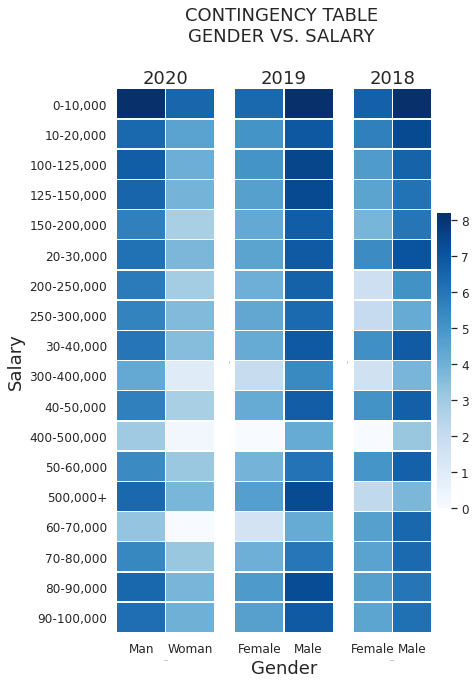

In [60]:
sns.set(font_scale=1.1)
plt.figure(figsize=(6,10))
ax1 = plt.subplot(131)
ax1 = sns.heatmap(sg20l.T, cmap=style2, 
           linewidth=0.3, cbar=False);
ax1.set_ylabel('Salary',fontsize=18)
ax1.set_xlabel('Job title',fontsize=0)
# title
ax1.set_title('2020',fontsize=18)
#plt.title(title, loc='left',fontsize=18)

ax2 = plt.subplot(132, sharey=ax1)
ax2 = sns.heatmap(sg19l.T, cmap=style2, 
           linewidth=0.3, cbar=False);
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('Country',fontsize=0)
ax2.set_xlabel('Gender',fontsize=18)
# title
ax2.set_title('CONTINGENCY TABLE \nGENDER VS. SALARY \n\n2019',fontsize=18)

ax3 = plt.subplot(133, sharey=ax1)
ax3 = sns.heatmap(sg18l.T, cmap=style2, 
           linewidth=0.3);
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.set_ylabel('Country',fontsize=0)
ax3.set_xlabel('Job title',fontsize=0)
ax3.set_title('2018',fontsize=18);

When the salary data is analyzed according to the independent gender of the country, 2D cannot conclude with a contingency table, he cannot conclude anything yet. Therefore, he raises a hypothesis test to verify if the economic remuneration is independent of the worker's gender:

In [61]:
hyp_test(sg18)

p-value: 2.2894144618183499e-07 is less than significance level: 0.05
Variables are dependent. Null hypothesis is rejected.


In [62]:
hyp_test(sg19)

p-value: 1.6967462236046496e-14 is less than significance level: 0.05
Variables are dependent. Null hypothesis is rejected.


In [63]:
hyp_test(sg20)

p-value: 4.912929349476759e-22 is less than significance level: 0.05
Variables are dependent. Null hypothesis is rejected.


### Salary gender dependency by country

In [64]:
def country_gender(country):
  '''
  Input:
  country: Name of the country you want to study

  Output:
  nw: DataFrame grouped by the chosen country
  '''
  #list of countries
  u=df20.Q3.unique()[1:]
  i = np.where(u == country)
  c = u[i[0][0]]
  df_country = df20.groupby('Q3').get_group(c)
  df_country.Q2.value_counts()

  nw=pd.crosstab(df_country.Q24, df_country.Q2)

  return nw

### India

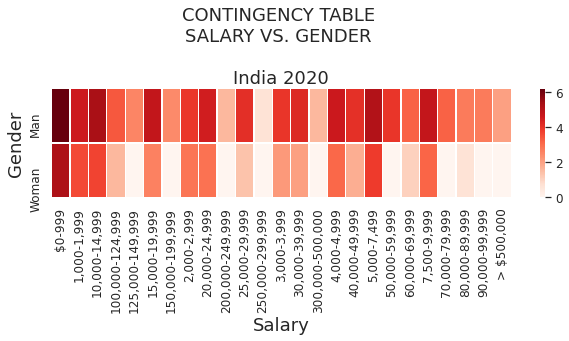

In [65]:
country = 'India'
ci = country_gender(country)
ci = ci.drop(['Prefer not to say', 'Prefer to self-describe'],axis=1)
cil = np.log(ci+1)

sns.set(font_scale=1.1)
plt.figure(figsize=(35,2))
ax1 = plt.subplot(131)
ax1 = sns.heatmap(cil.T, cmap='Reds', 
           linewidth=0.3);
ax1.set_ylabel('Gender',fontsize=18)
ax1.set_xlabel('Salary',fontsize=18)
# title
ax1.set_title('CONTINGENCY TABLE \nSALARY VS. GENDER \n\n'+ country + ' 2020',fontsize=18);

In [66]:
hyp_test(ci)

p-value: 1.590947564015469e-12 is less than significance level: 0.05
Variables are dependent. Null hypothesis is rejected.


For India, which is the country with the largest number of people who have the dataset given by the oracle, it is found that there is a dependence in salary with gender, that is, it is a country where there is no gender equality. 

Observing this conclusion, 2D asks the same question but with his country.

### Colombia

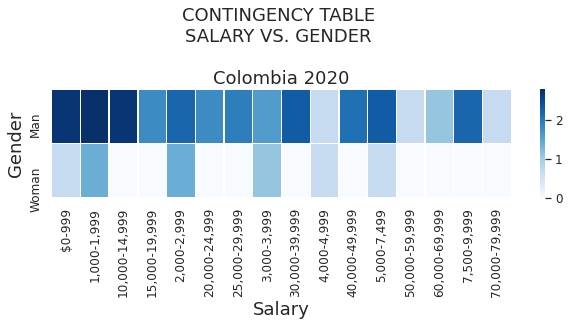

In [67]:
country = 'Colombia'
ci = country_gender(country)
#ci = ci.drop(['Prefer not to say', 'Prefer to self-describe'],axis=1)
cil = np.log(ci+1)

sns.set(font_scale=1.1)
plt.figure(figsize=(35,2))
ax1 = plt.subplot(131)
ax1 = sns.heatmap(cil.T, cmap=style2, 
           linewidth=0.3);
ax1.set_ylabel('Gender',fontsize=18)
ax1.set_xlabel('Salary',fontsize=18)
# title
ax1.set_title('CONTINGENCY TABLE \nSALARY VS. GENDER \n\n'+ country + ' 2020',fontsize=18);

In [68]:
hyp_test(ci)

p-value: 0.18235076699677966 is greater than significance level: 0.05
Variables are independent. Null hypothesis is accepted.


In this case, 2D is glad that his country has gender equality, because the salary does not depend on gender. Finally, 2D reviews the same hypothesis for China.

### China

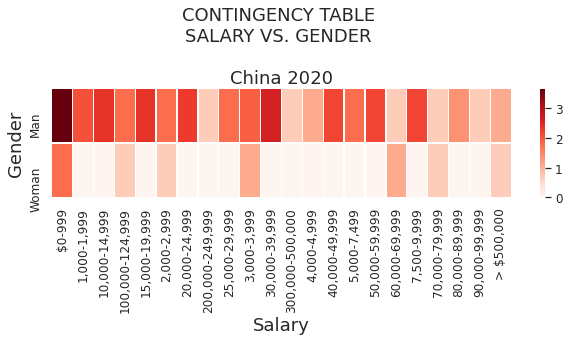

In [69]:
country = 'China'
ci = country_gender(country)
#ci = ci.drop(['Prefer not to say', 'Prefer to self-describe'],axis=1)
ci = ci.drop(['Prefer not to say'],axis=1)
cil = np.log(ci+1)

sns.set(font_scale=1.1)
plt.figure(figsize=(35,2))
ax1 = plt.subplot(131)
ax1 = sns.heatmap(cil.T, cmap='Reds', 
           linewidth=0.3);
ax1.set_ylabel('Gender',fontsize=18)
ax1.set_xlabel('Salary',fontsize=18)
# title
ax1.set_title('CONTINGENCY TABLE \nSALARY VS. GENDER \n\n'+ country + ' 2020',fontsize=18);

In [70]:
hyp_test(ci)

p-value: 0.032908031318671316 is less than significance level: 0.05
Variables are dependent. Null hypothesis is rejected.


In this case, 2D learns that as in India, in China there is no gender equality.

2D could ask the oracle many more questions but with the information obtained, he already knows what decision to make and change his work situation, so he thanks the oracle and goes on.